In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [73]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [74]:
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [75]:
df = df.replace("?", np.nan) 

# Remove rows with any missing values
df_cleaned = df.dropna(inplace = True)

# Remove columns with any missing values
df_cleaned = df.dropna(axis=1)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

df_cleaned.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [76]:
scaler = StandardScaler()
X = df_cleaned[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size','bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]
df_standardized = pd.DataFrame(scaler.fit_transform(X))
print(df_standardized)

           0         1         2         3         4         5         6   \
0    0.298157  0.364430  0.305113  0.177143 -0.258394 -0.336785 -0.413240   
1    0.220504  0.364430  0.408113  0.177143  0.755296  0.552401 -0.413240   
2    1.462948  1.766029  2.983113  0.796169  0.796925  0.552401 -0.413240   
3    1.462948  1.766029  2.983113  0.884602  1.300648  0.387737 -0.638386   
4    0.569942  0.381841 -0.415887  0.177143 -0.137667 -0.369717  0.750015   
..        ...       ...       ...       ...       ...       ...       ...   
154  2.103582  1.426511  1.695613  0.707737  1.021727  0.717065  1.800697   
155  2.103582  1.426511  1.644113  0.707737  1.223632  0.717065  1.800697   
156  2.103582  1.426511  1.695613  0.707737  1.146617  1.770915  1.050210   
157  2.103582  1.426511  1.695613  0.707737  1.573324  0.848797 -1.088678   
158  2.103582  1.426511  1.695613  0.707737  1.250692  0.717065  1.800697   

           7         8         9         10        11        12        13  

In [77]:
#df_encoded = pd.get_dummies(df, columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
#                                         'fuel-system'])
#print(df_encoded)

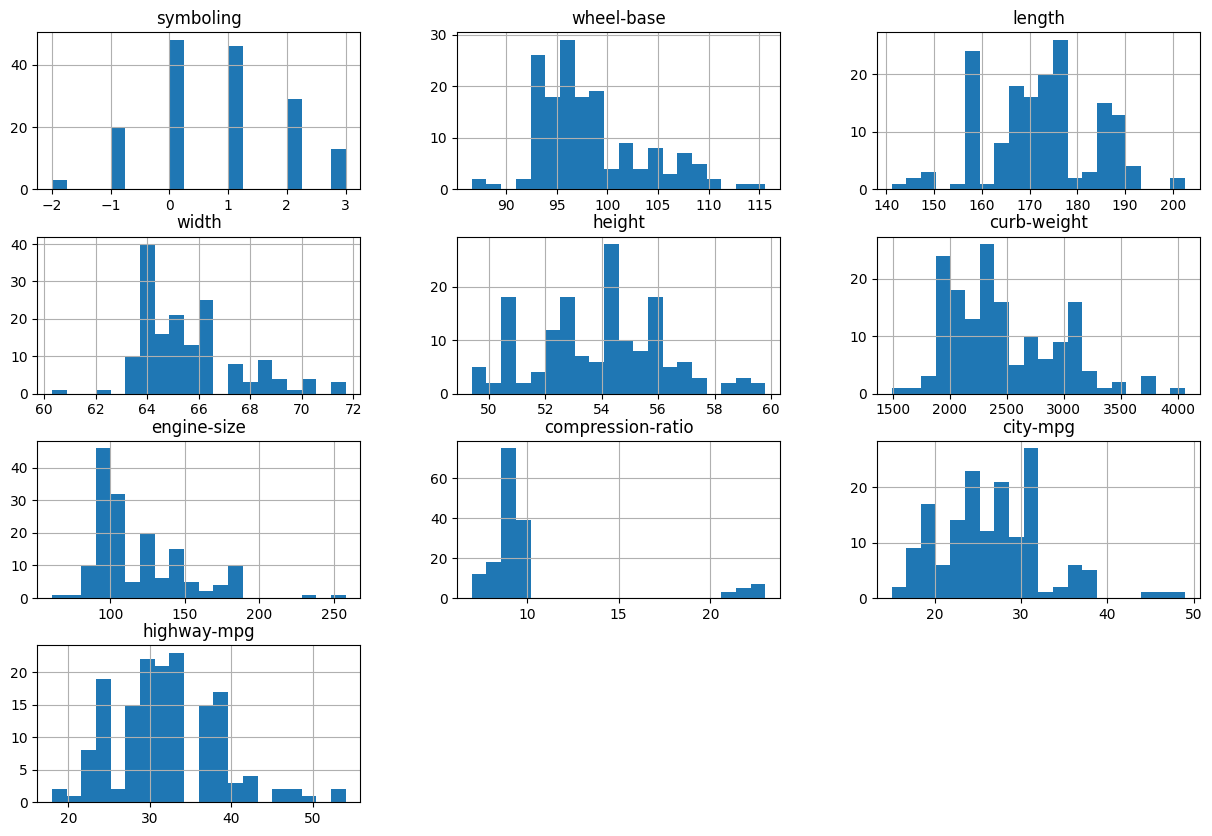

In [78]:
# Histogram for each numerical feature
df_cleaned.hist(bins=20, figsize=(15, 10))
plt.show()

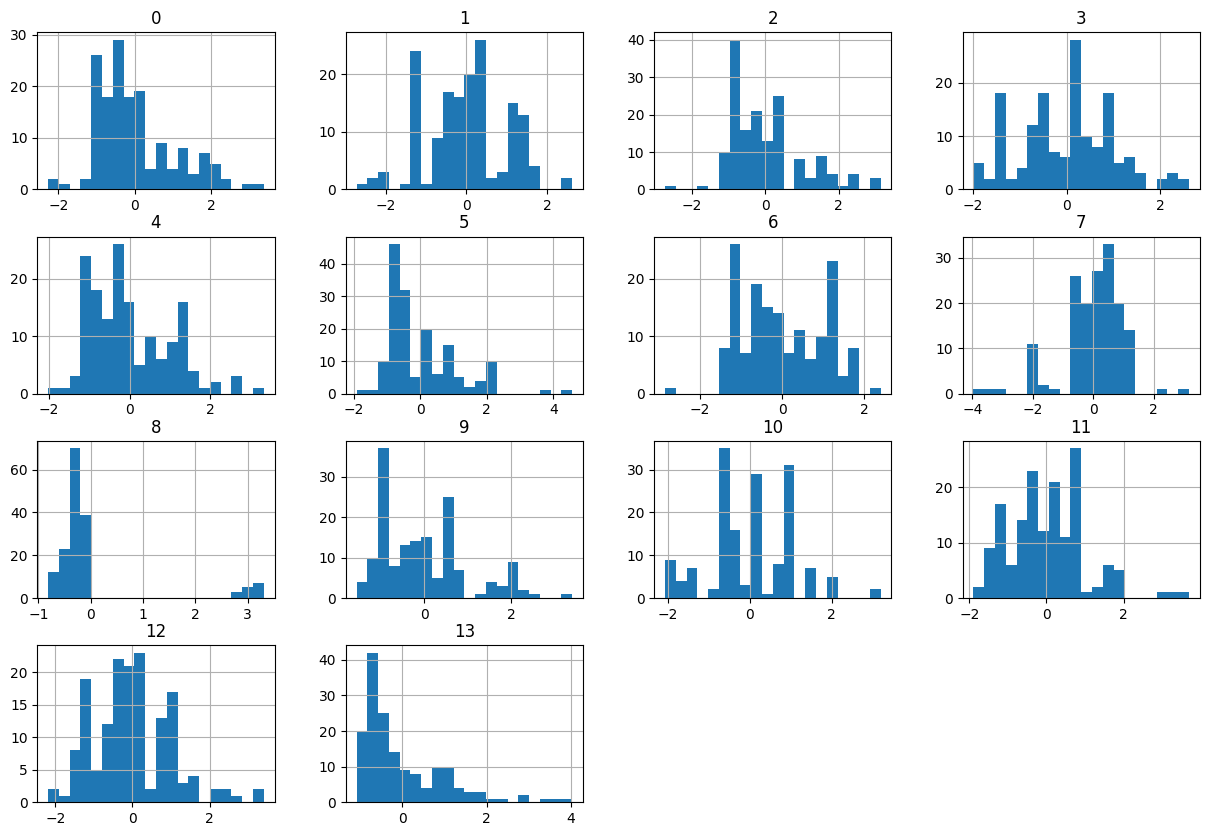

In [79]:
# Histogram for each numerical feature
df_standardized.hist(bins=20, figsize=(15, 10))
plt.show()

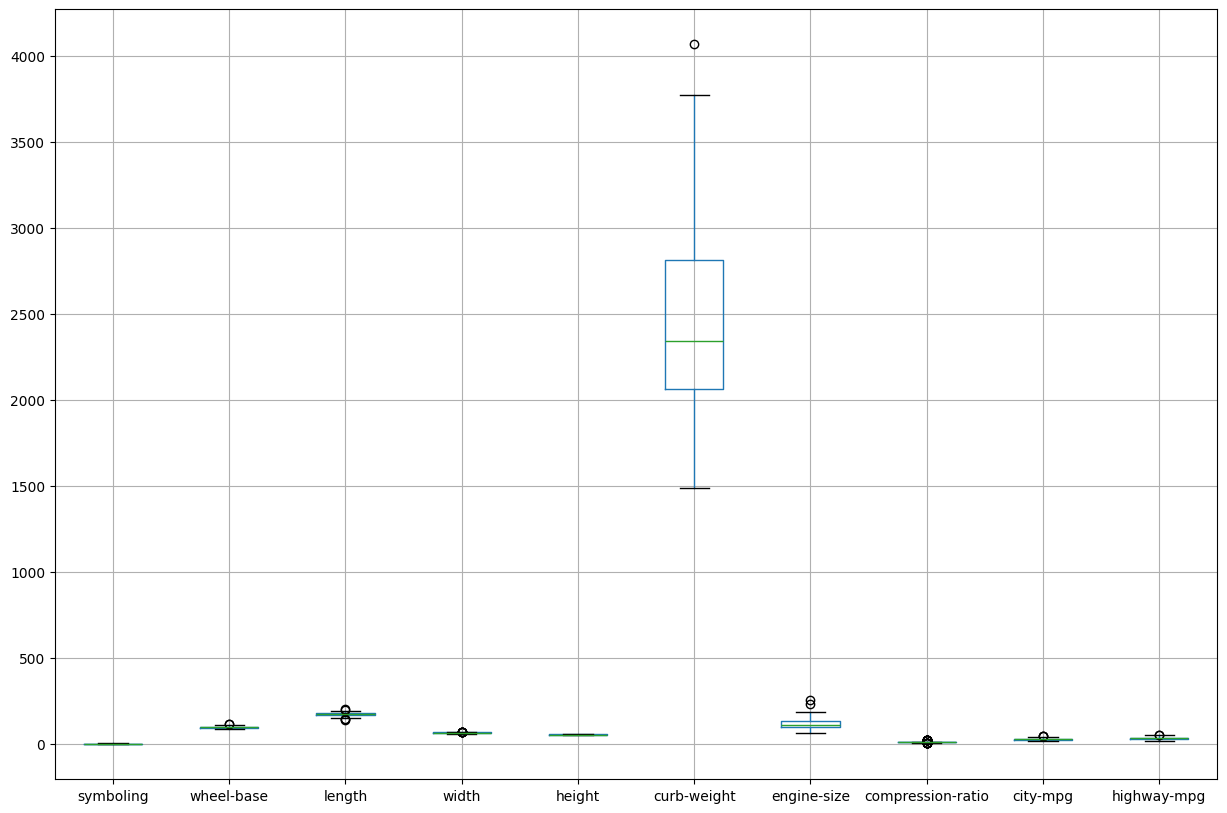

In [80]:
# Box plots for each numerical feature
df_cleaned.boxplot(figsize=(15, 10))
plt.show()

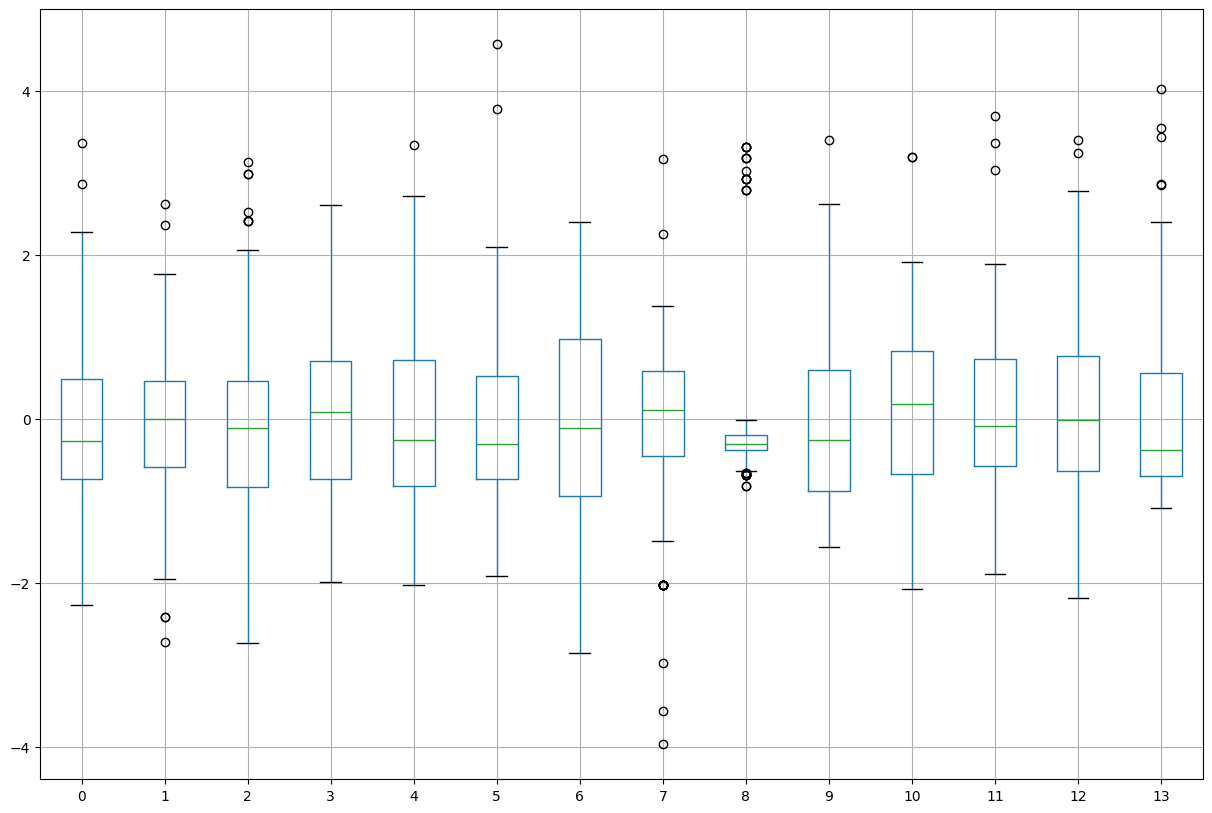

In [81]:
# Box plots for each numerical feature
df_standardized.boxplot(figsize=(15, 10))
plt.show()

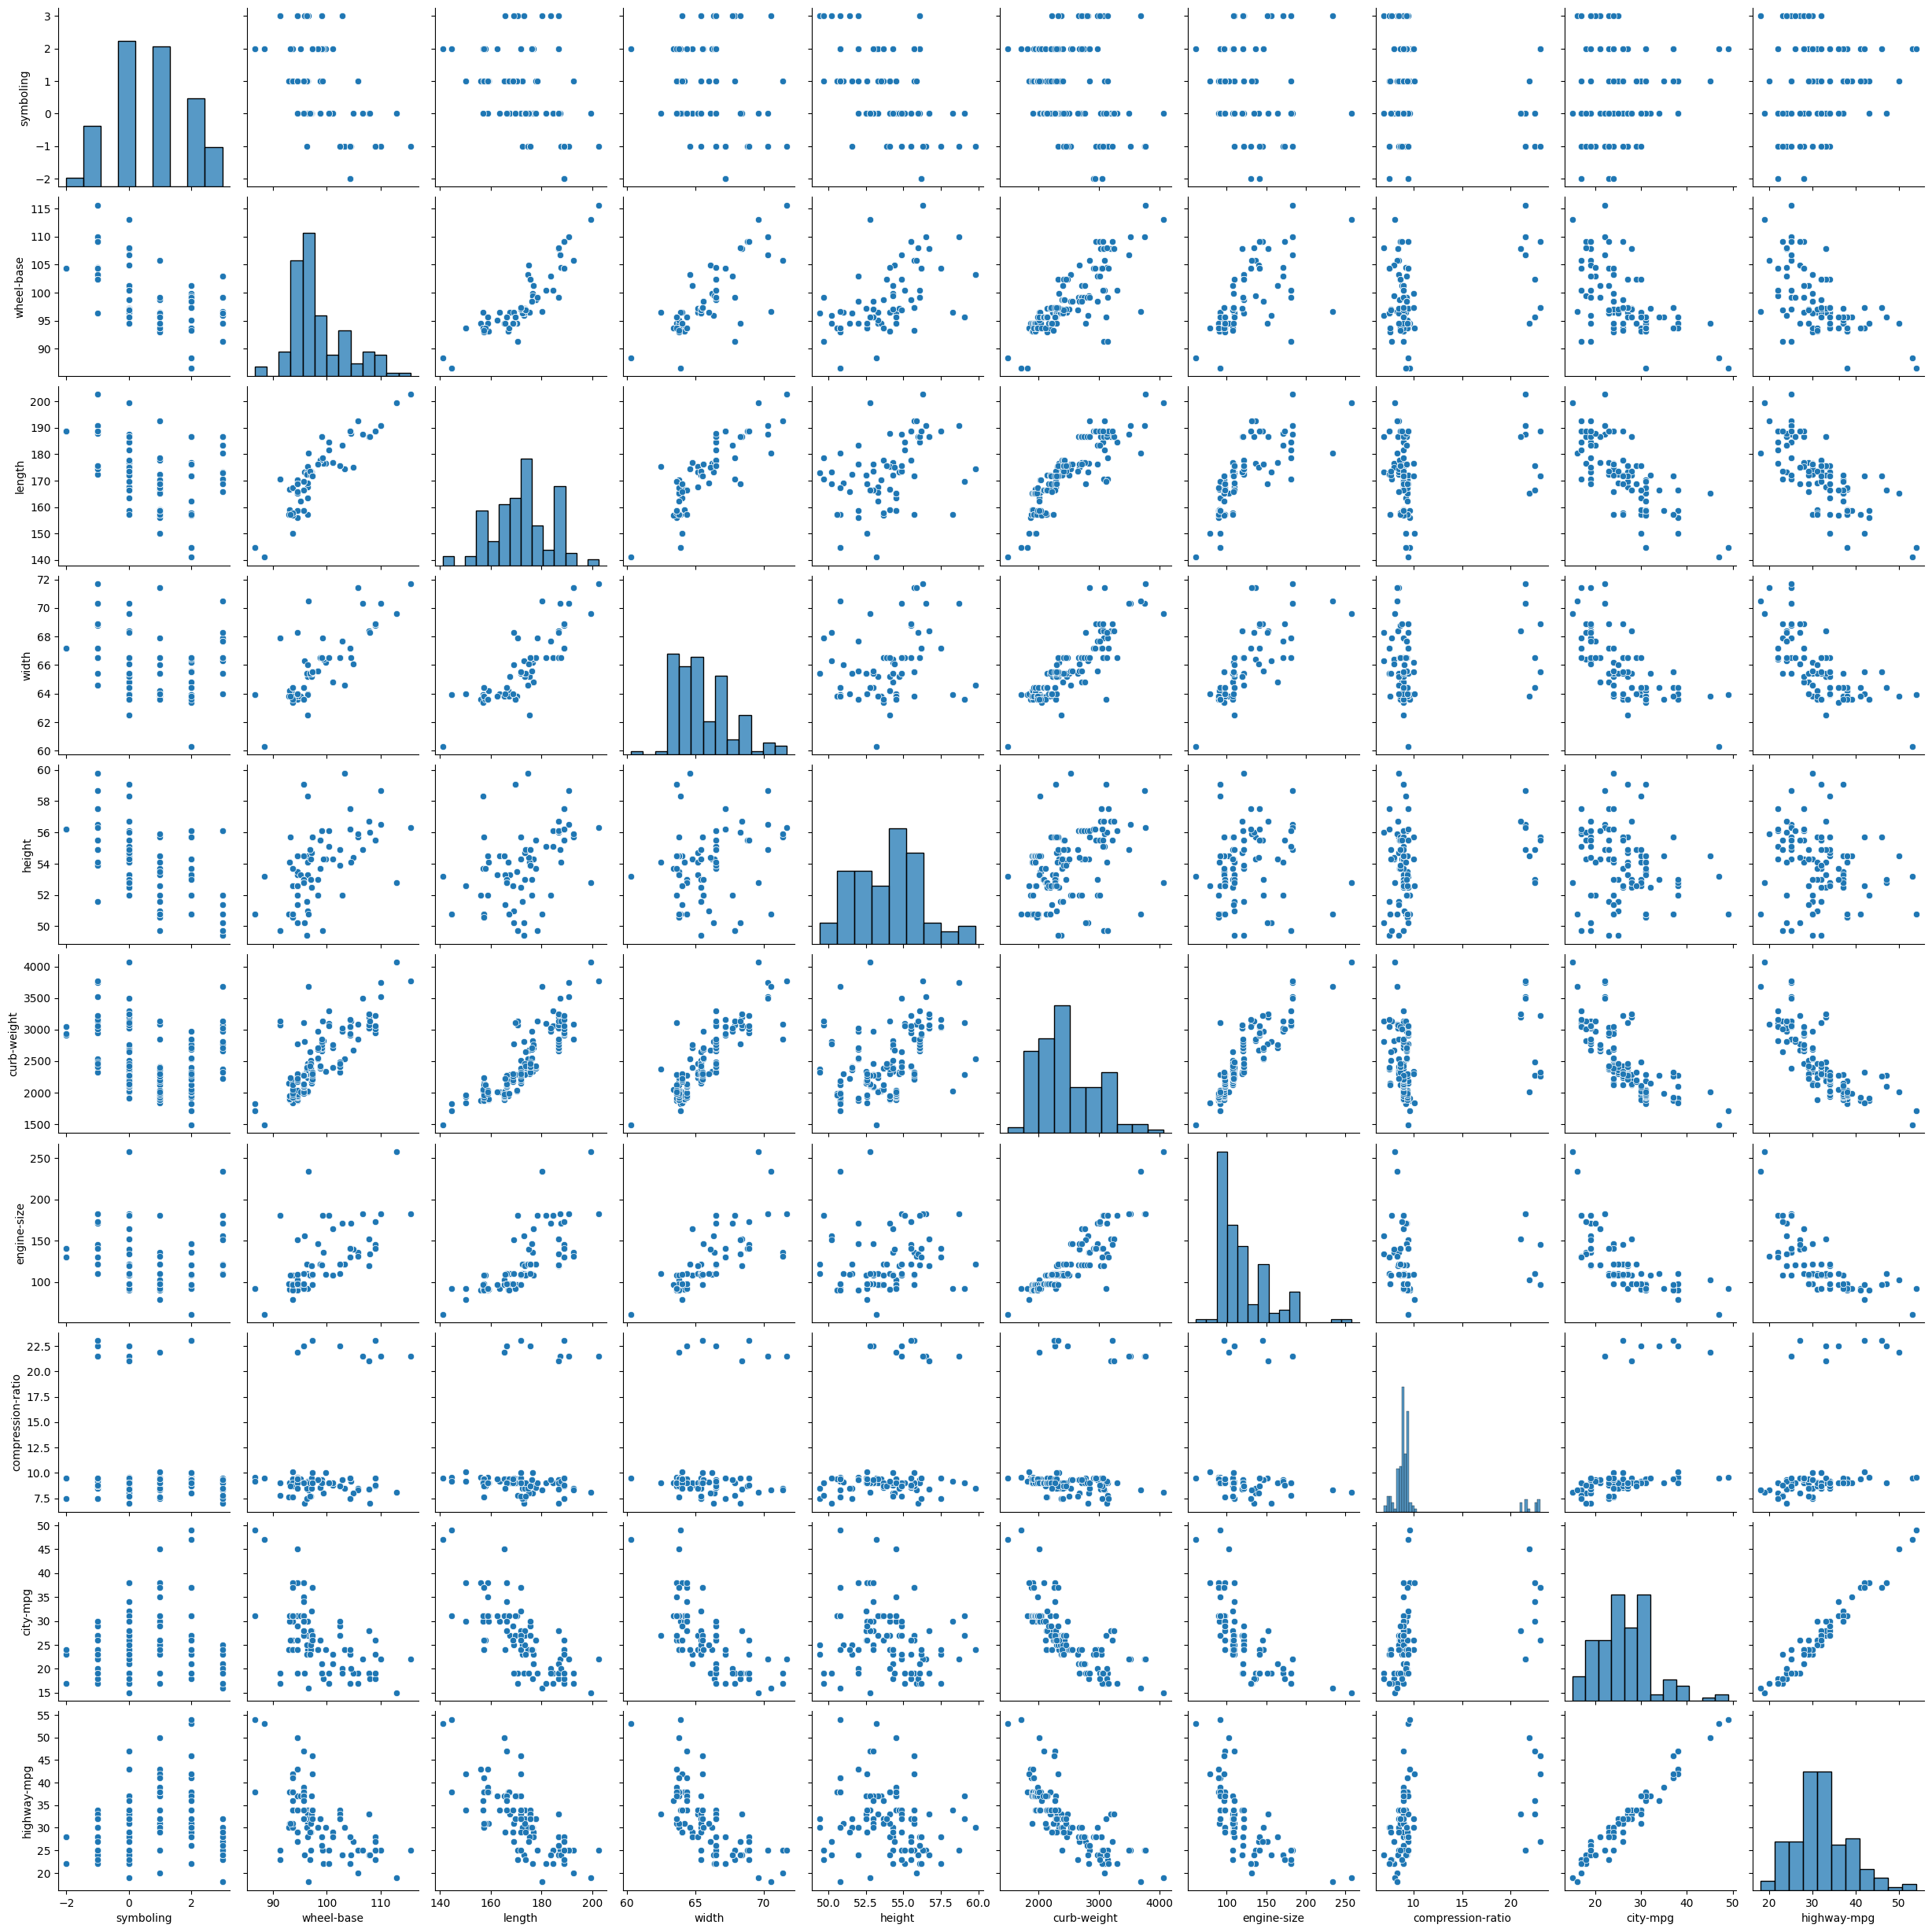

In [82]:
# Pairplot for numerical features
sns.pairplot(df)
plt.show()

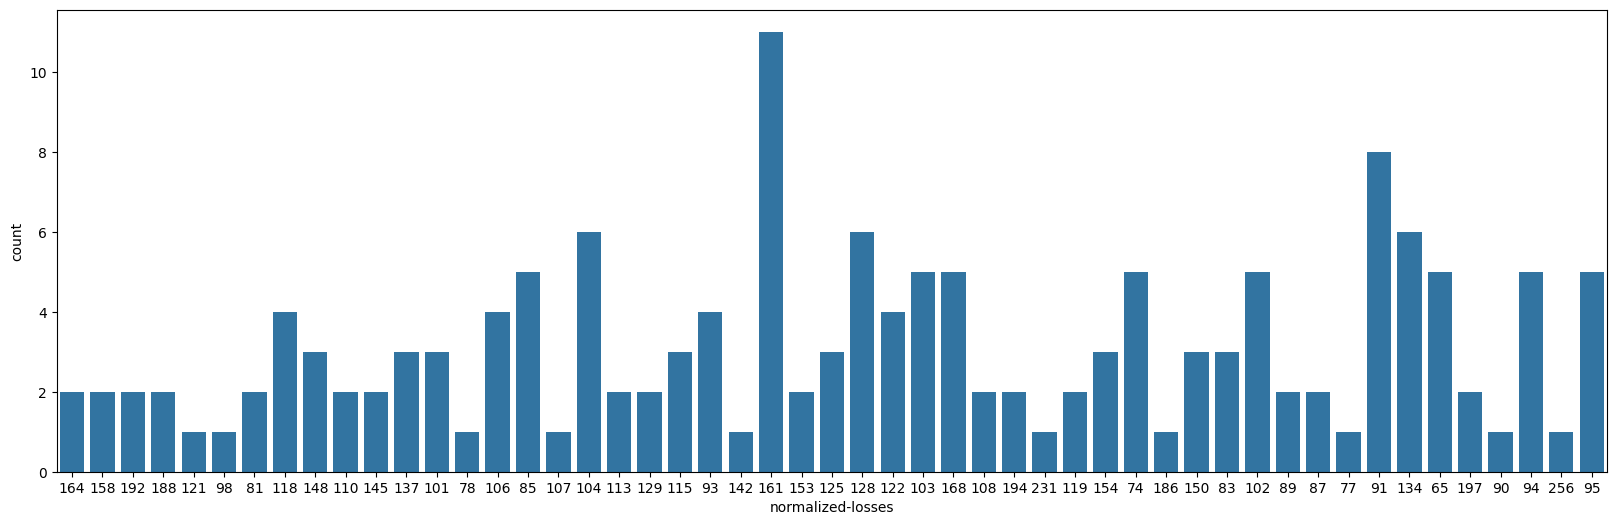

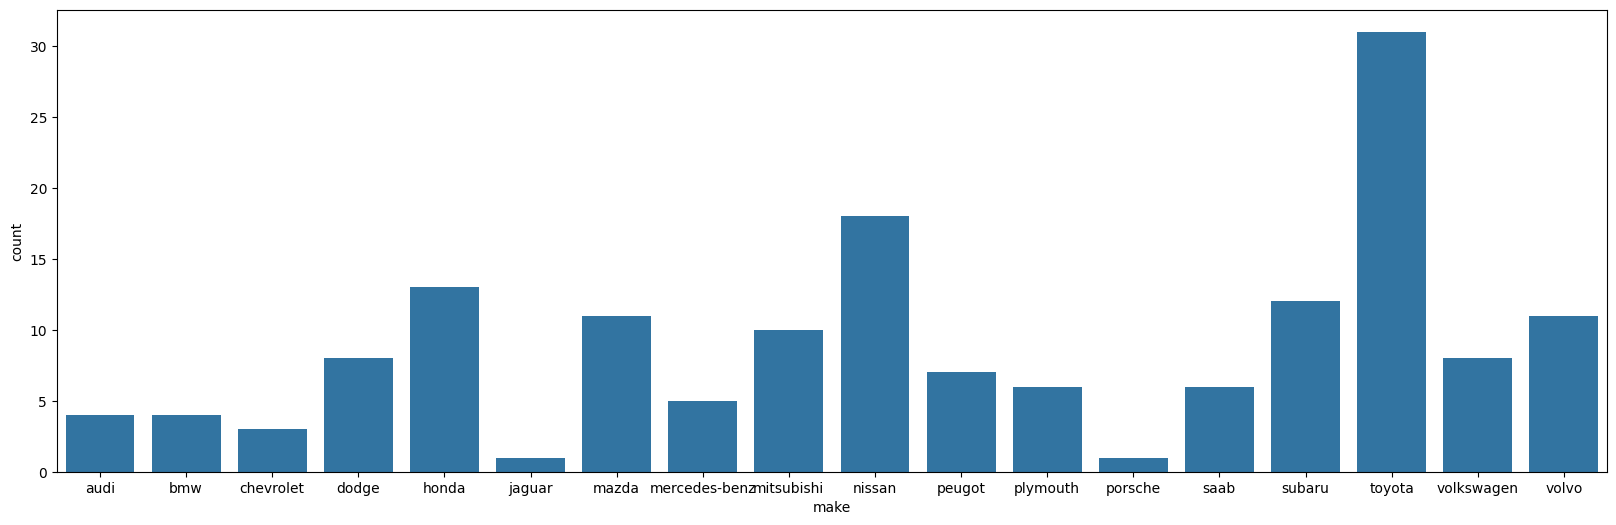

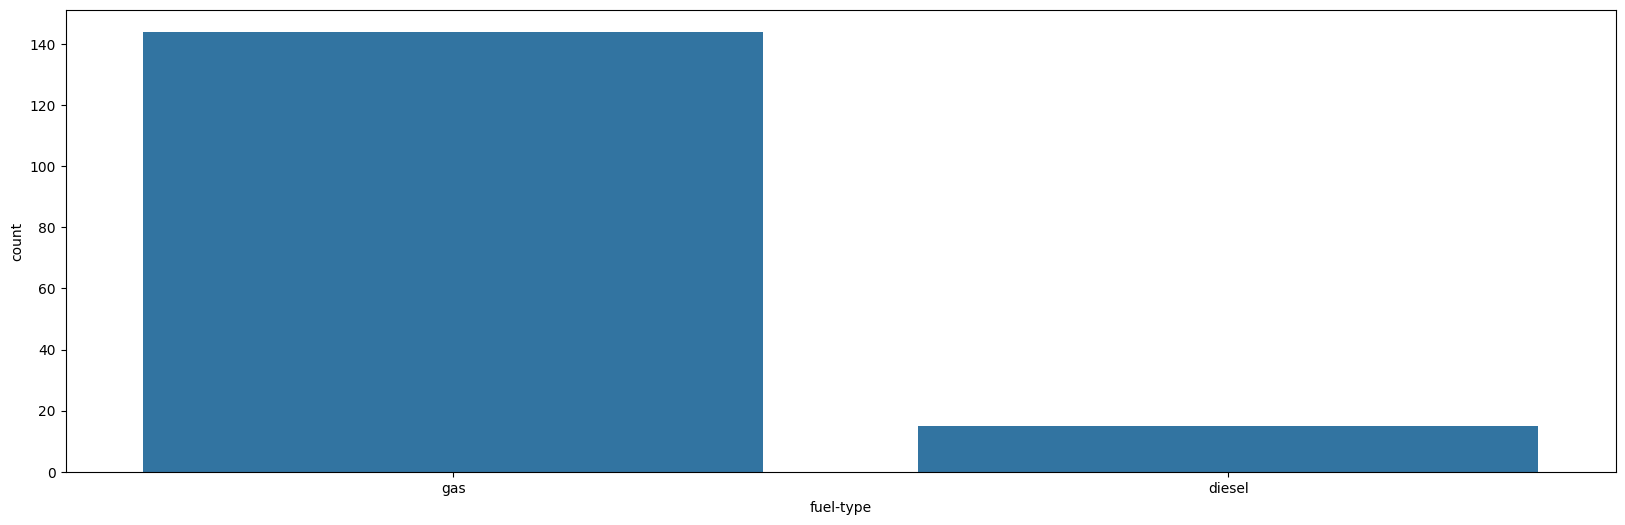

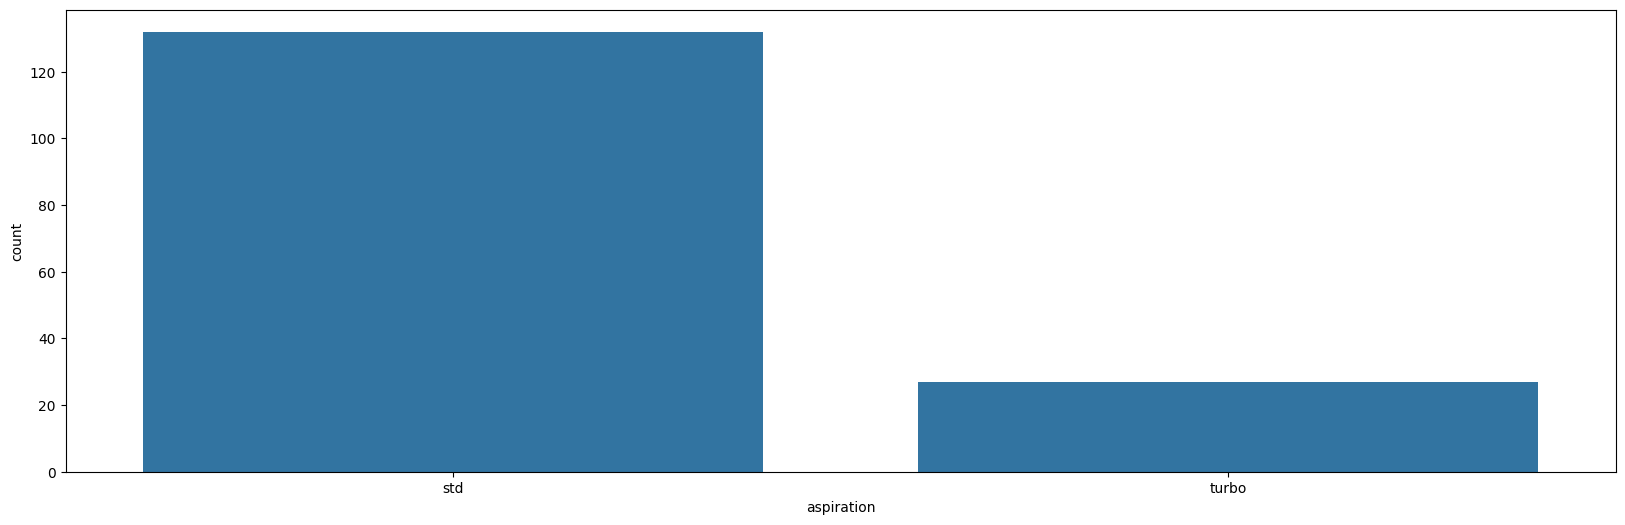

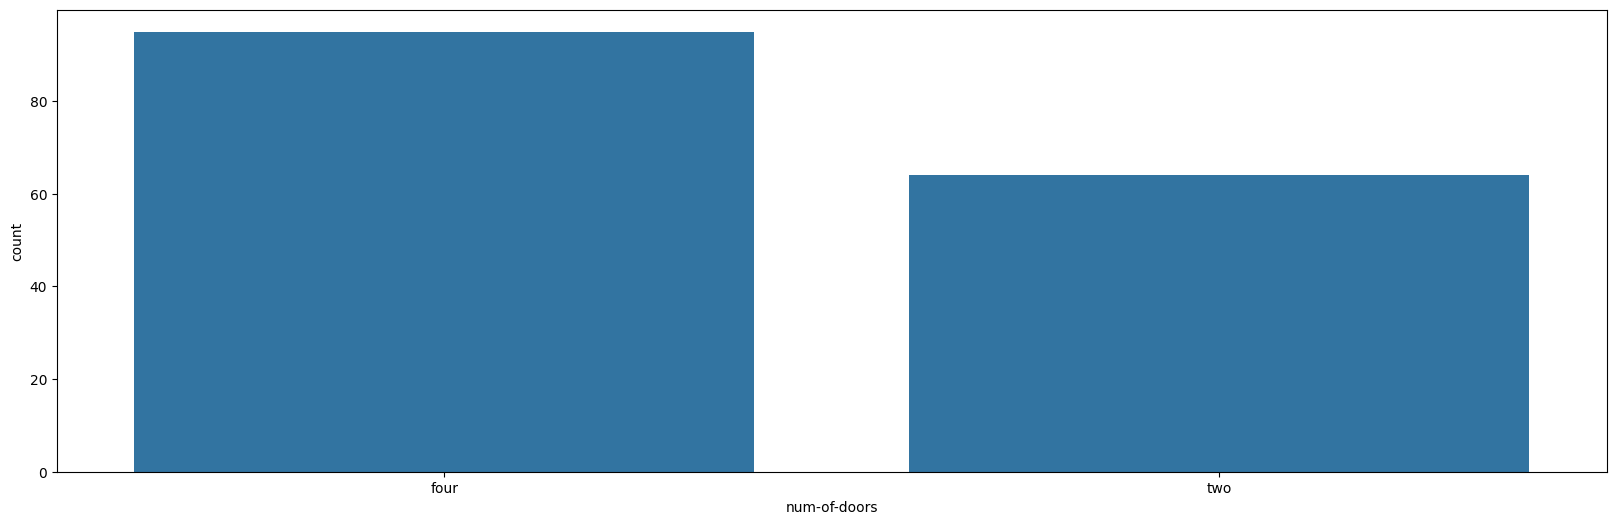

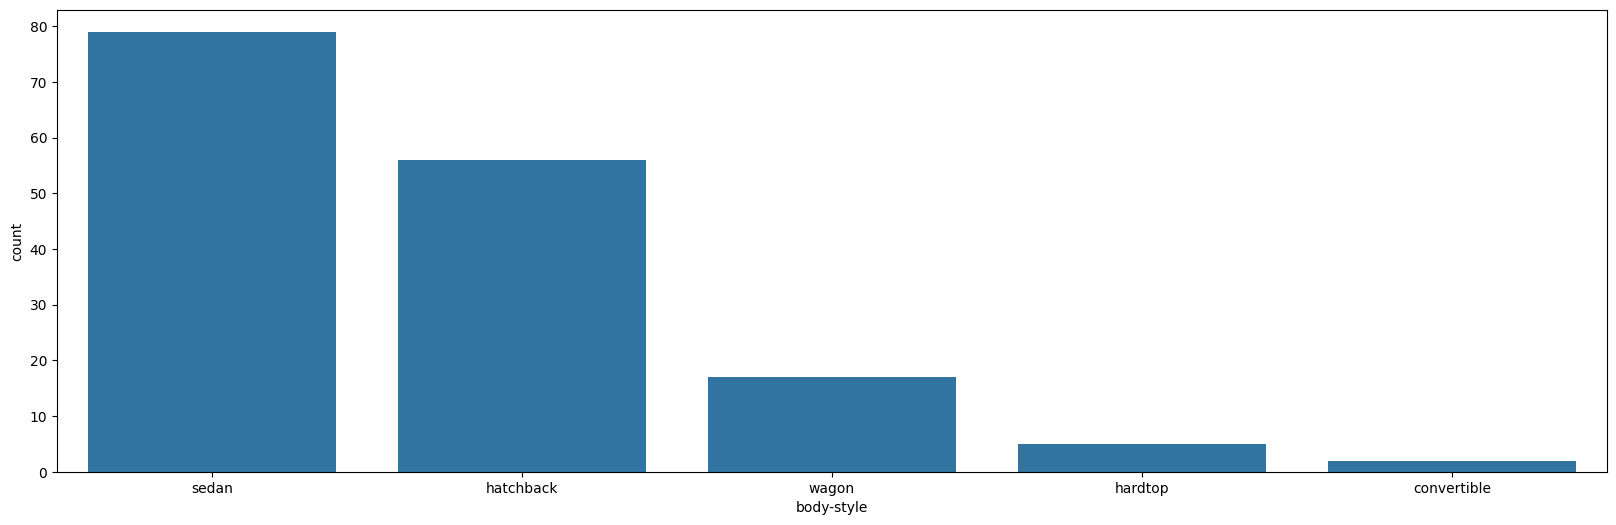

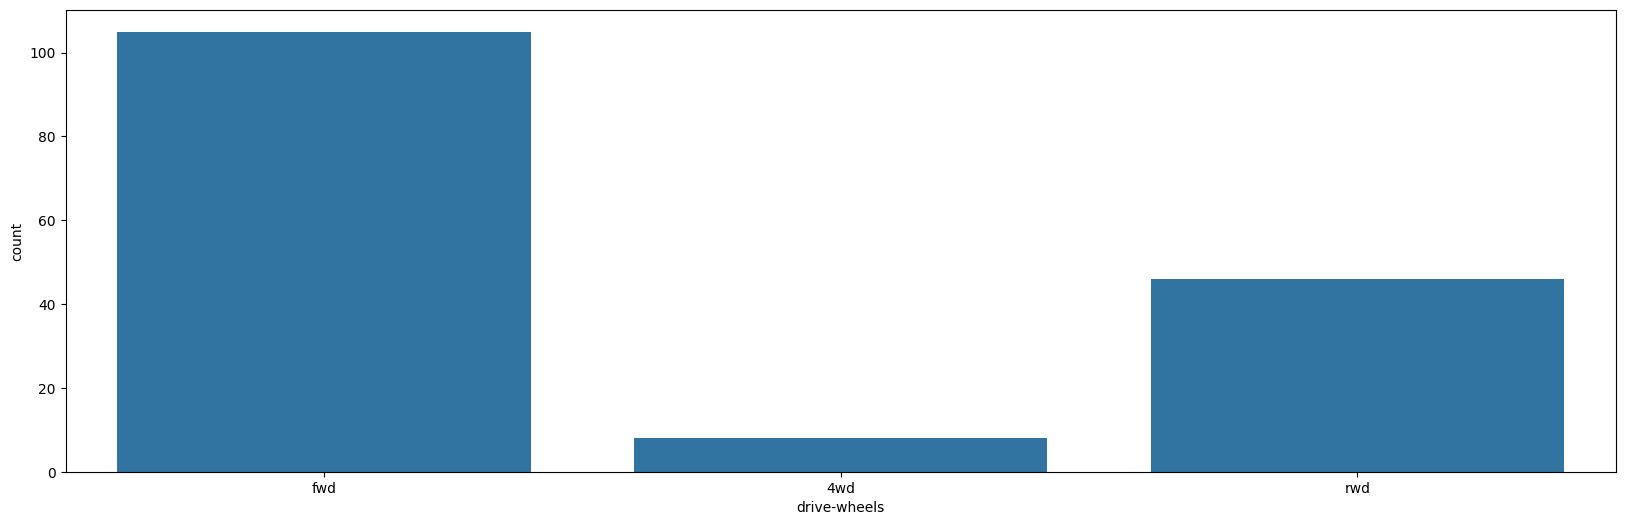

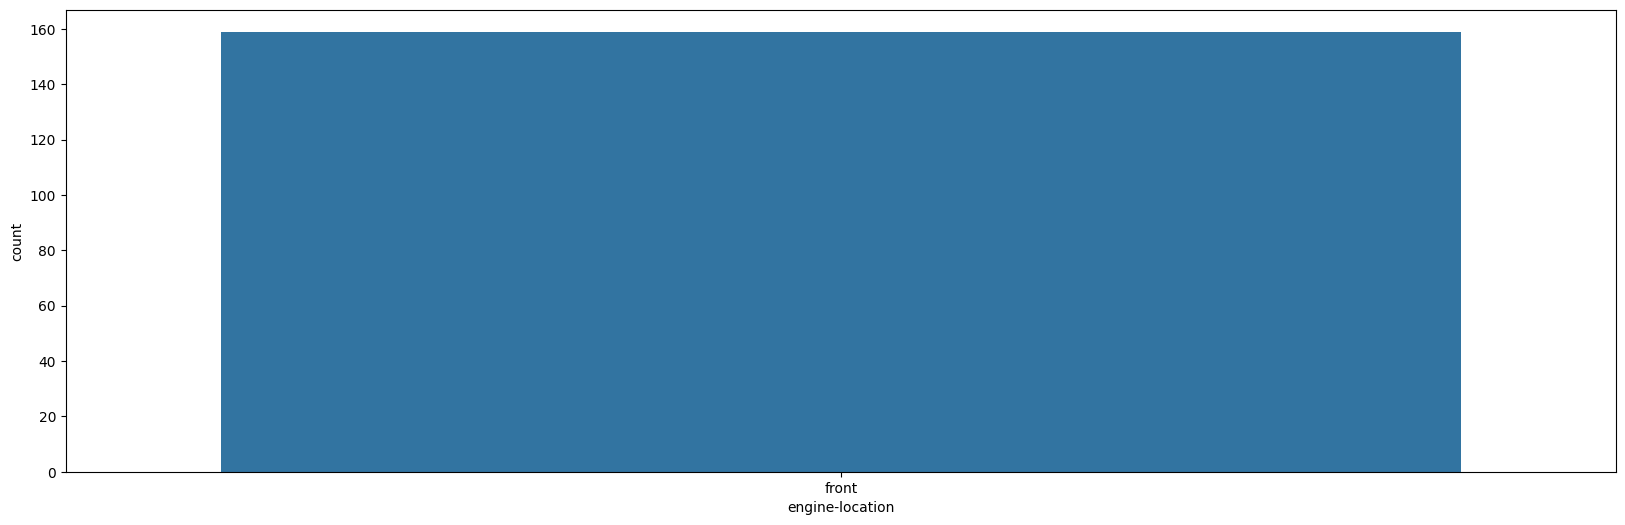

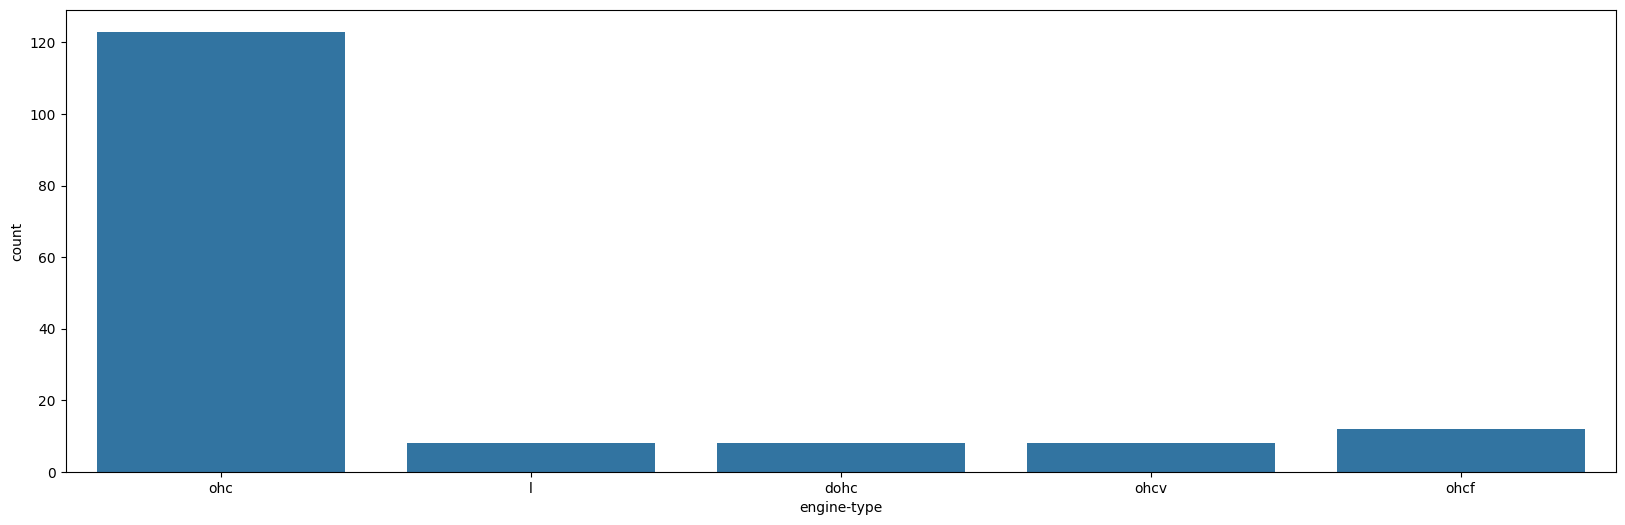

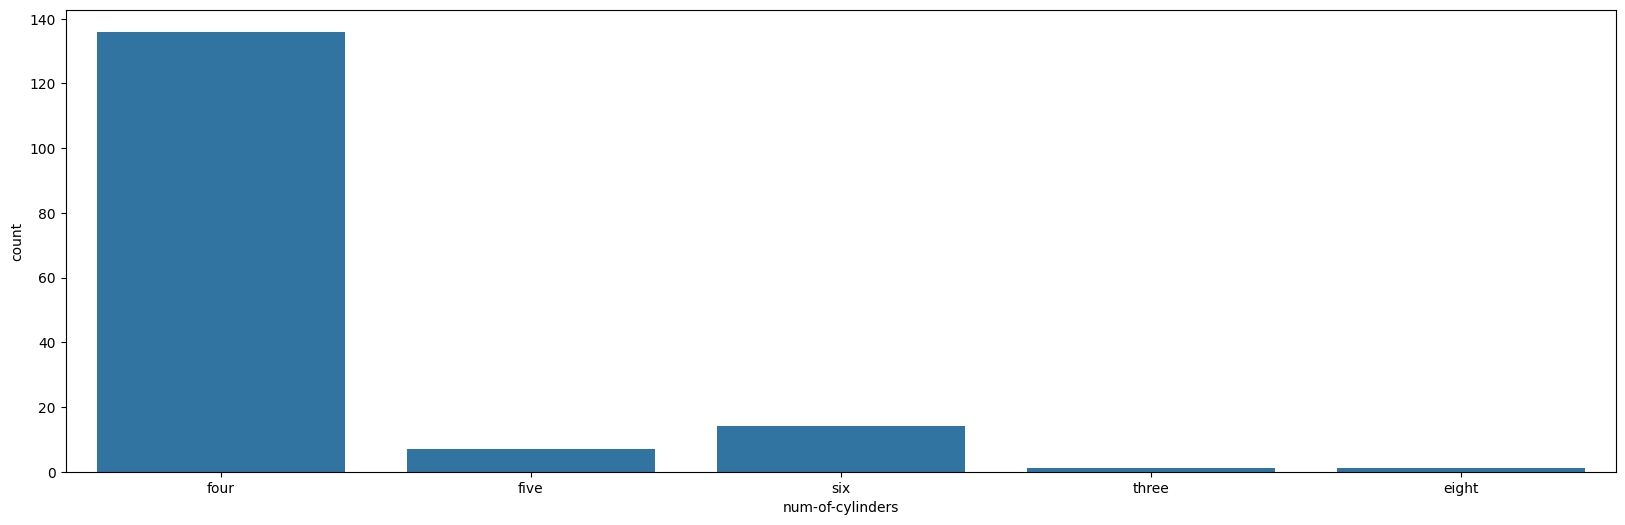

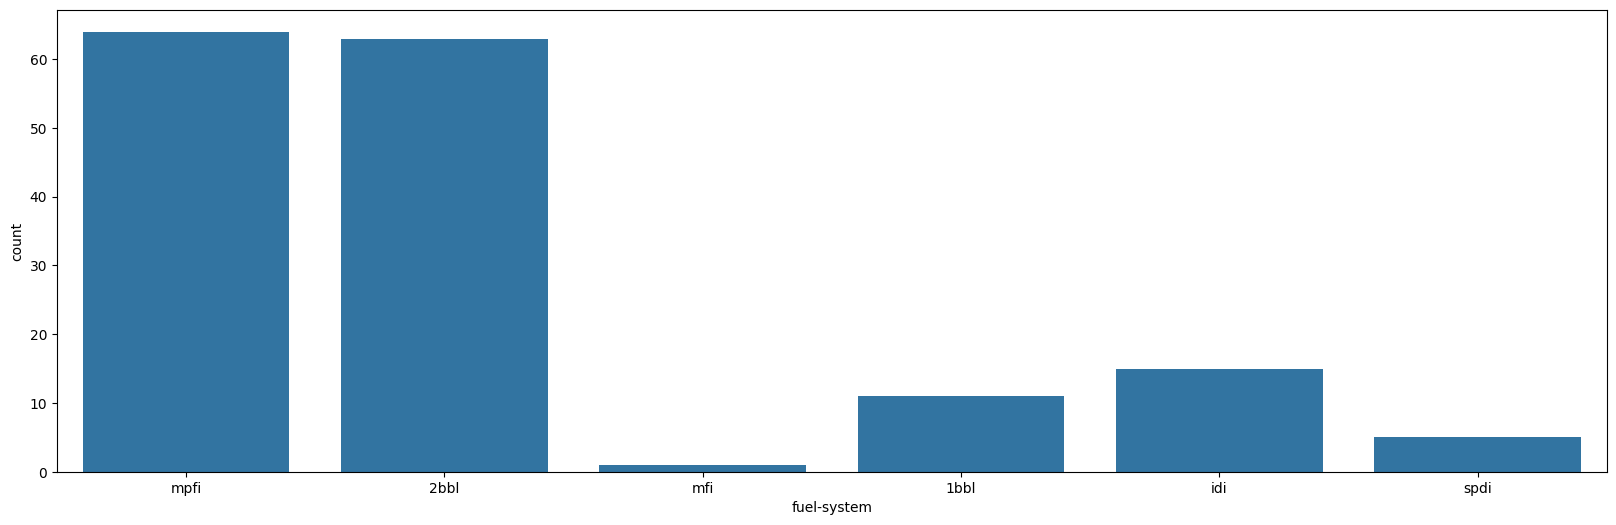

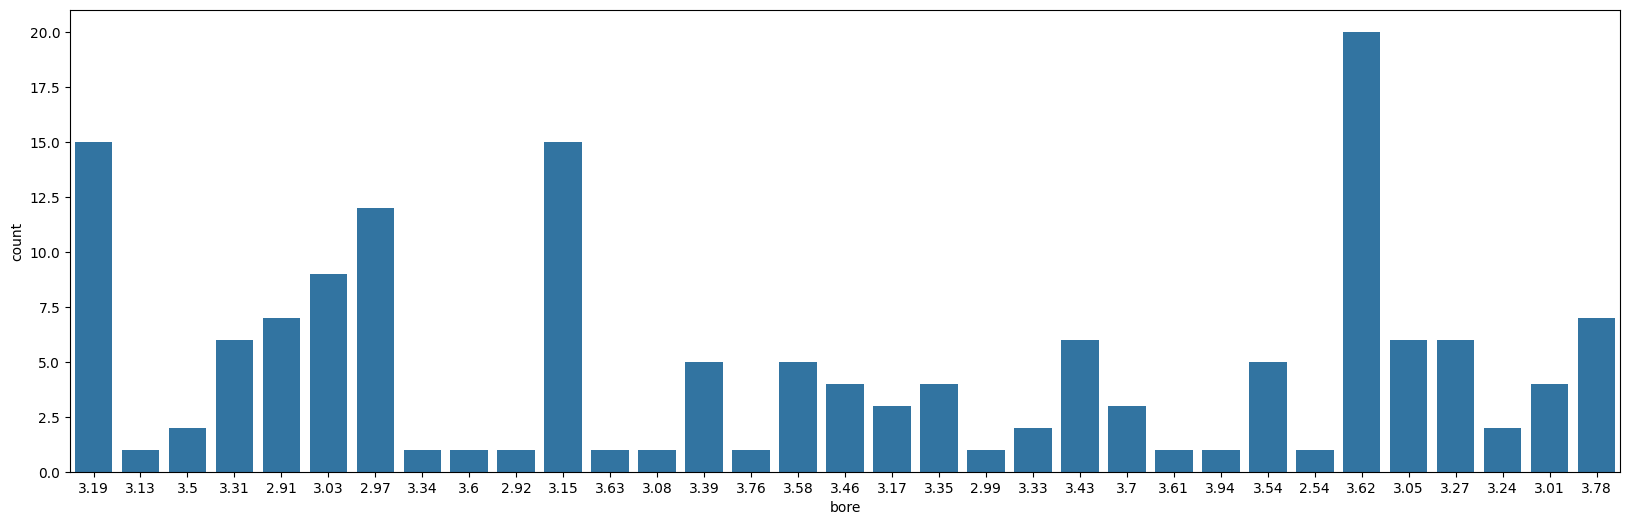

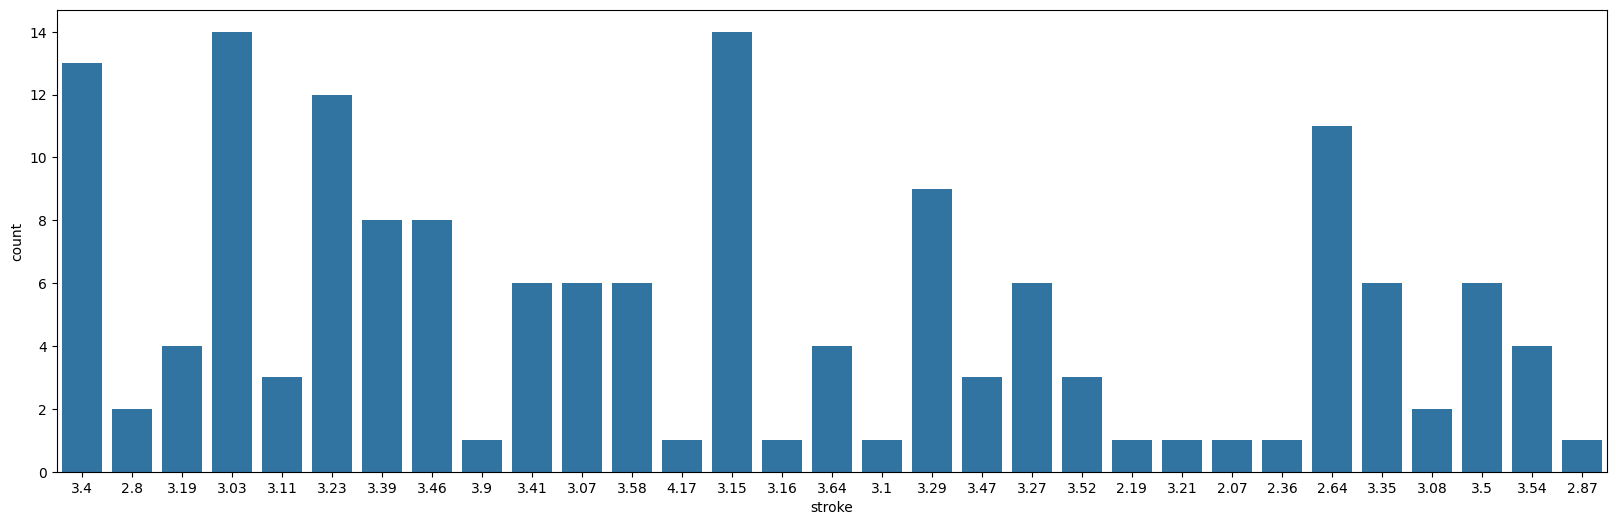

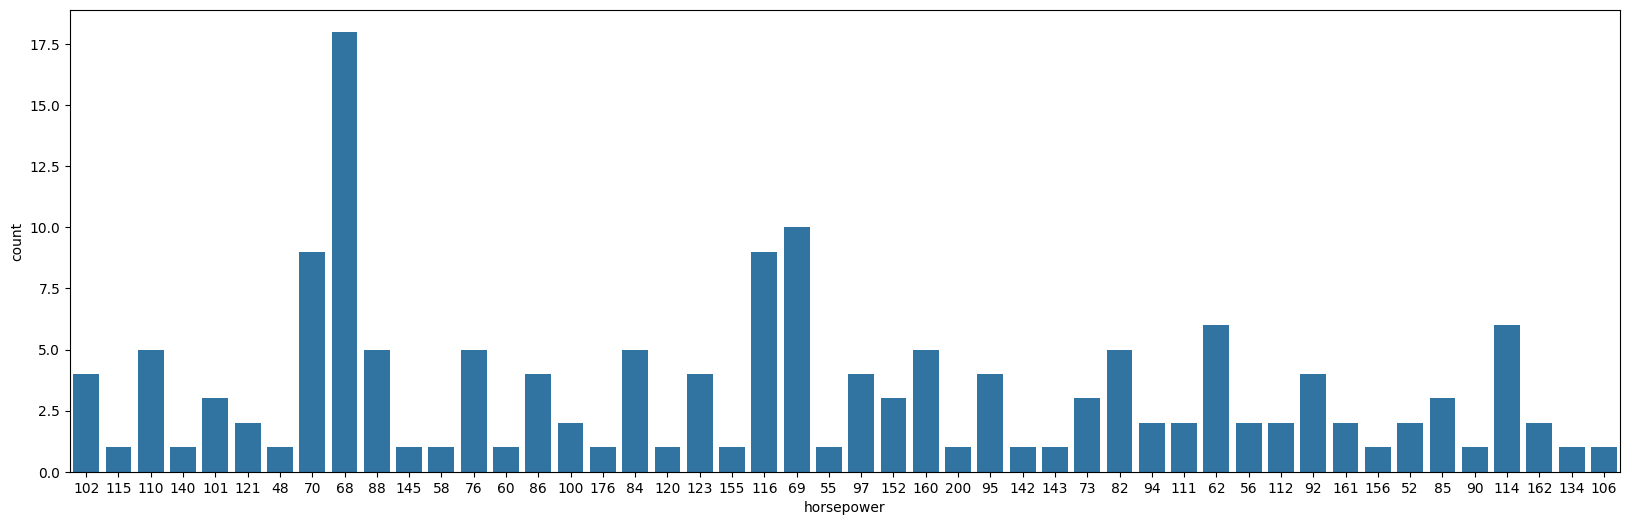

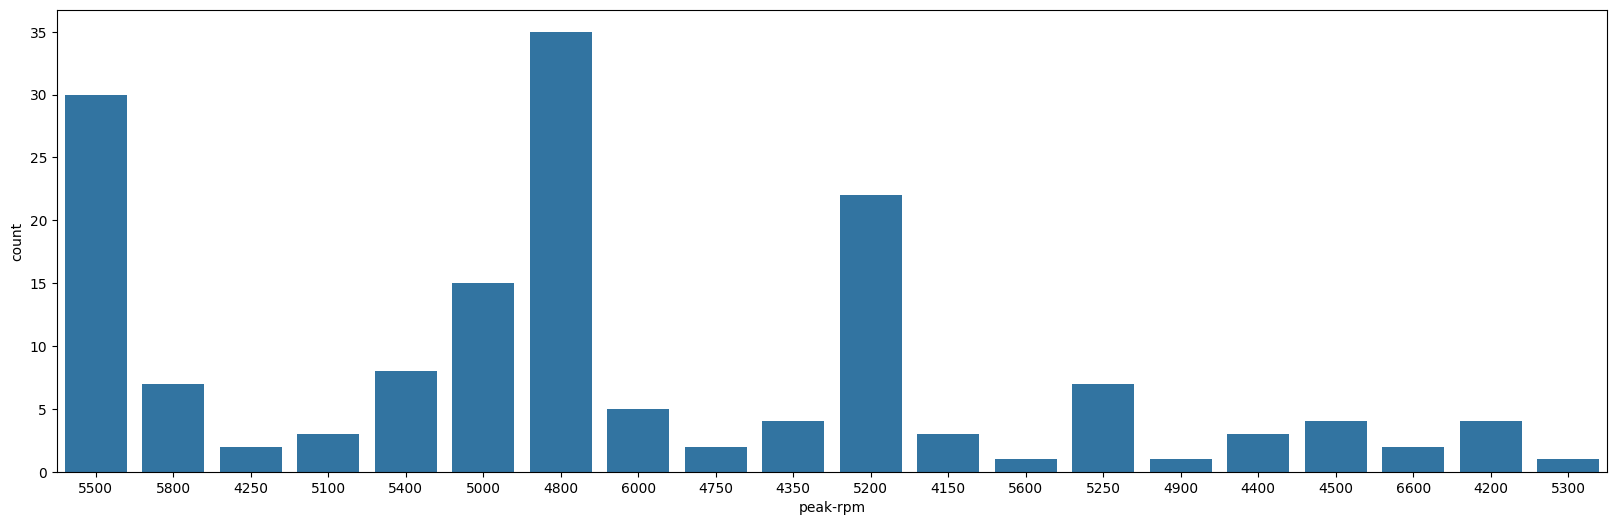

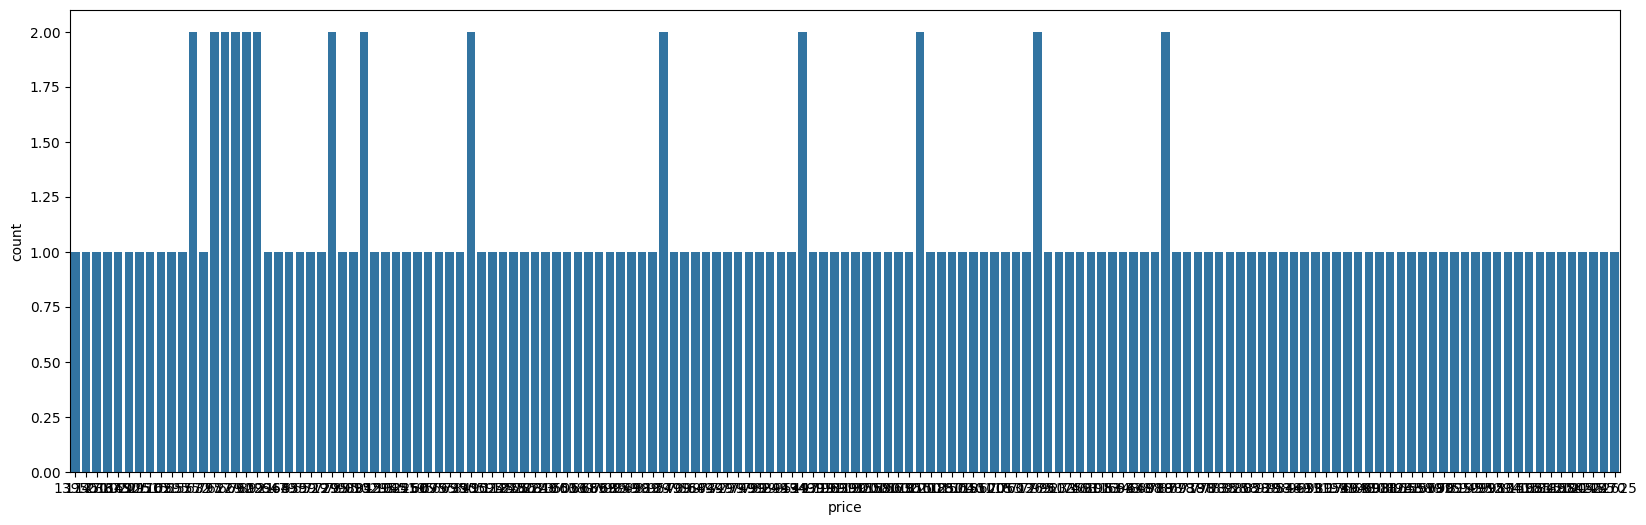

In [83]:
#categorical features
# Countplot for each categorical feature
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=column, data=df)
    plt.show()

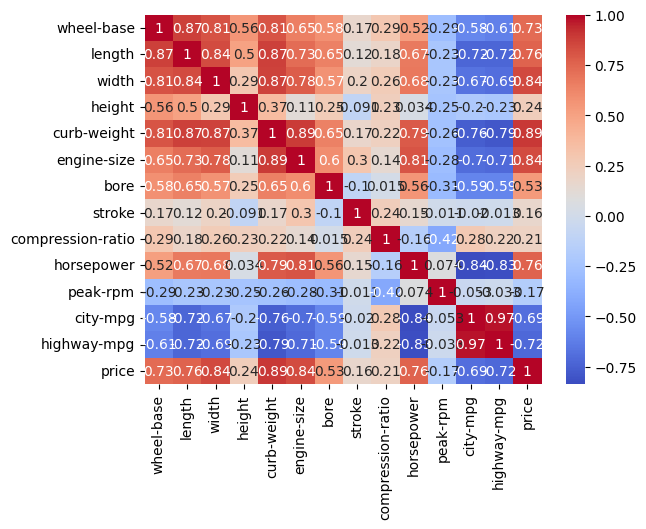

In [84]:
#correlation analysis
# Correlation matrix for numerical features
X = df_cleaned[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size','bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

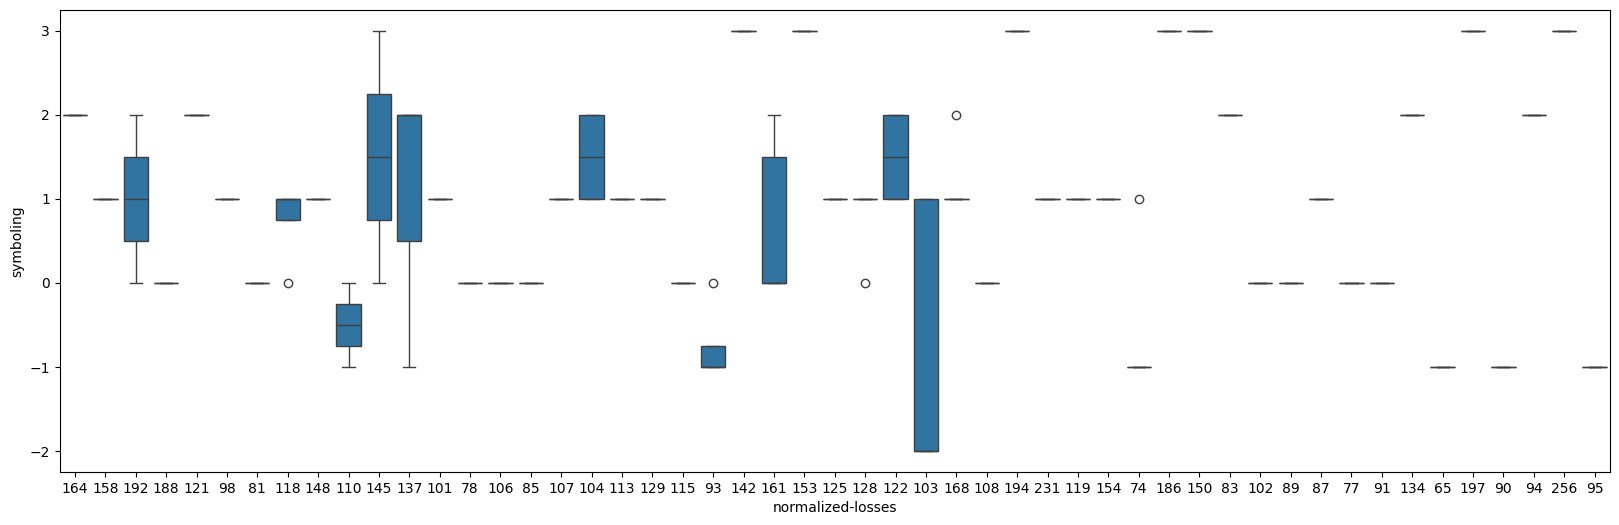

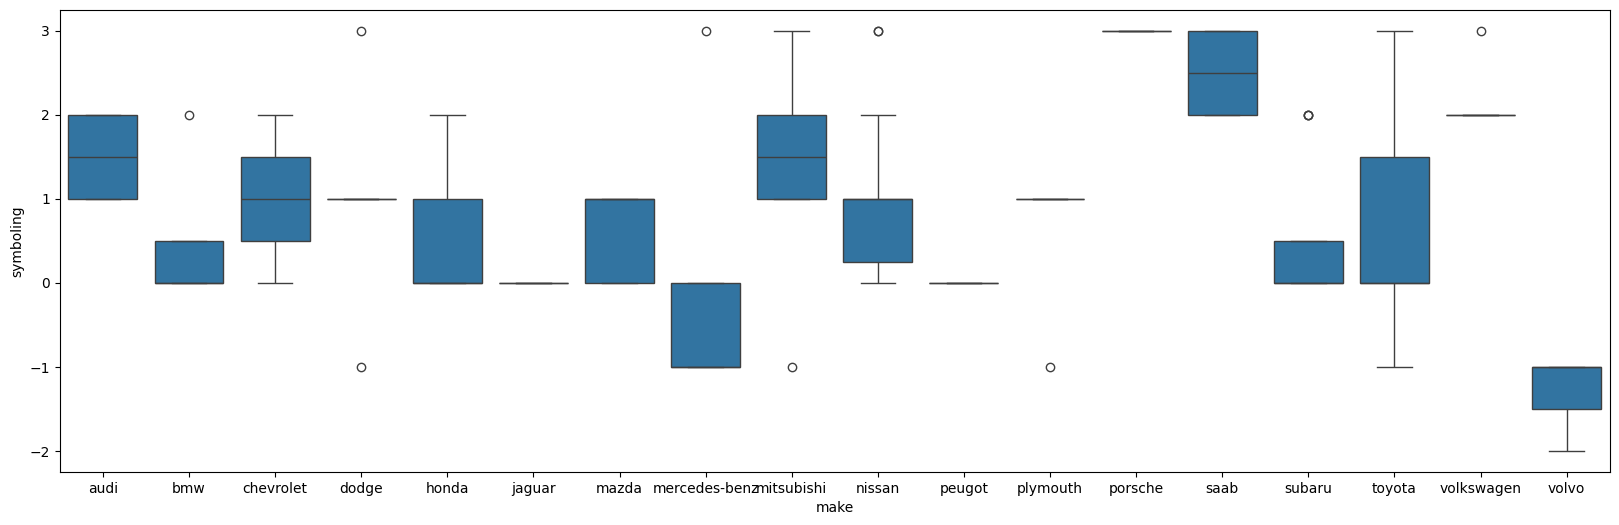

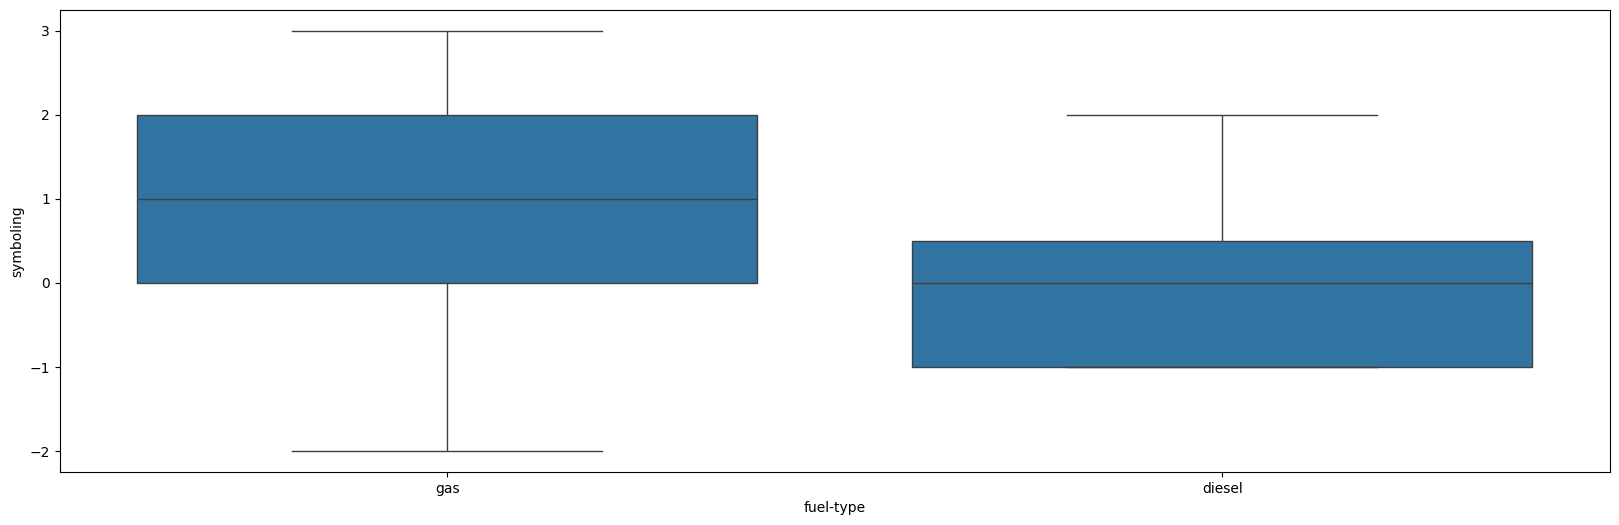

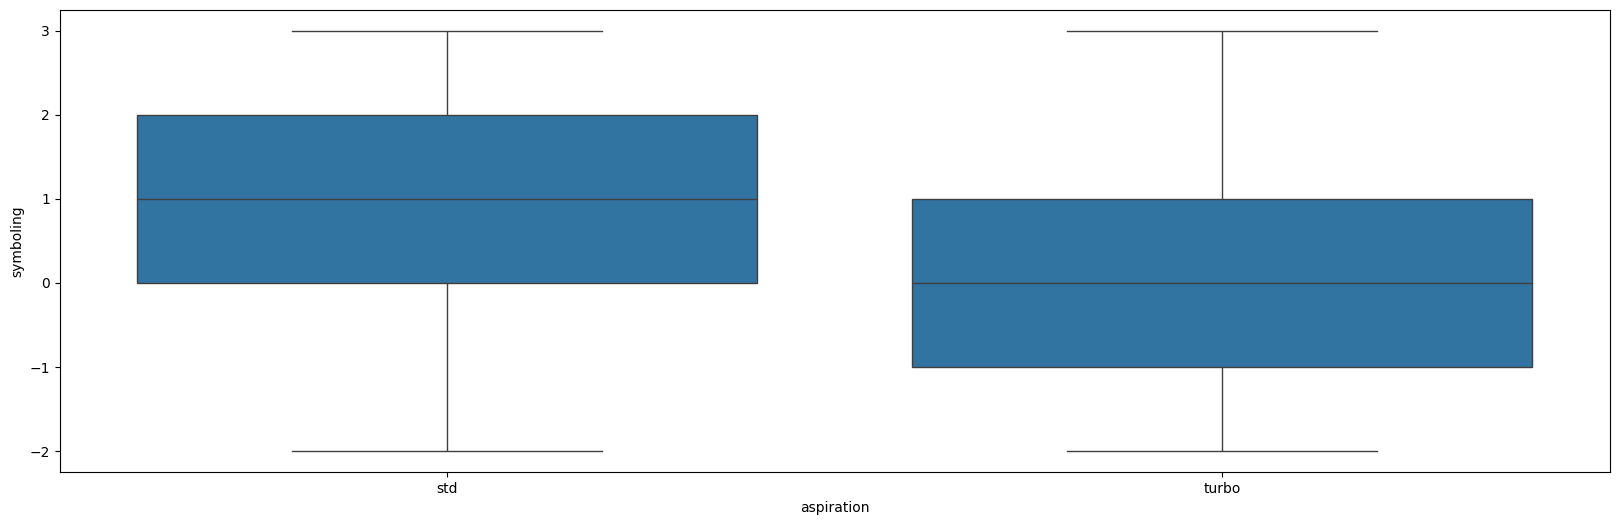

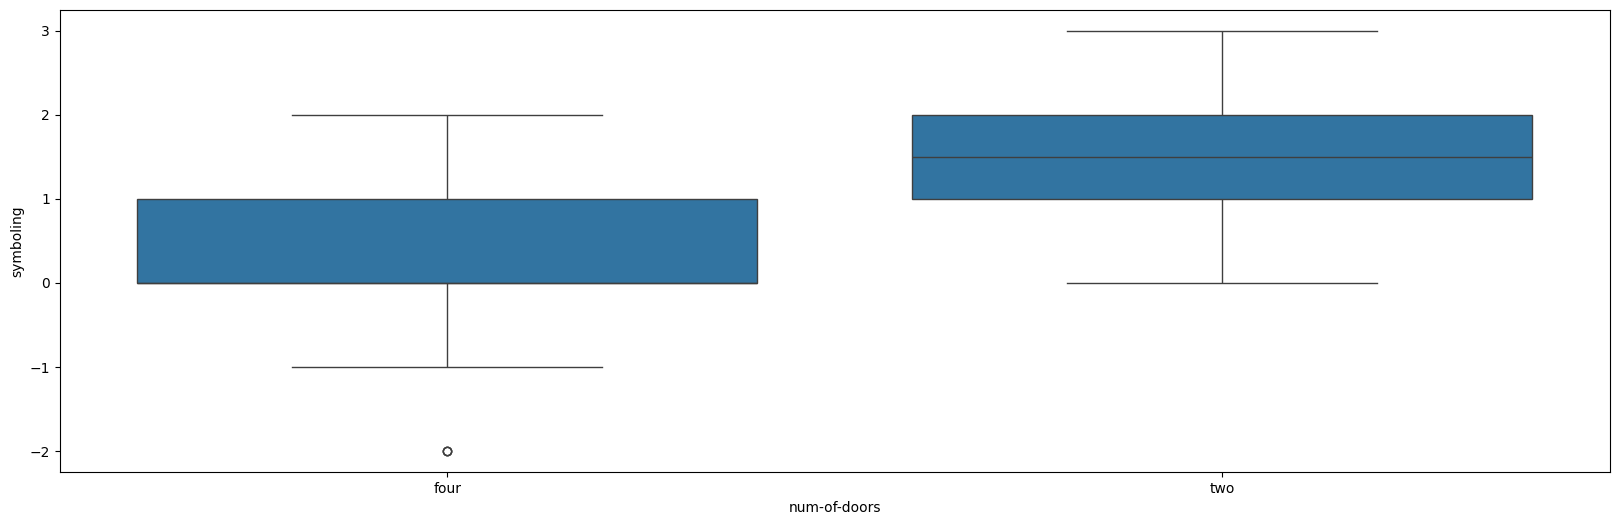

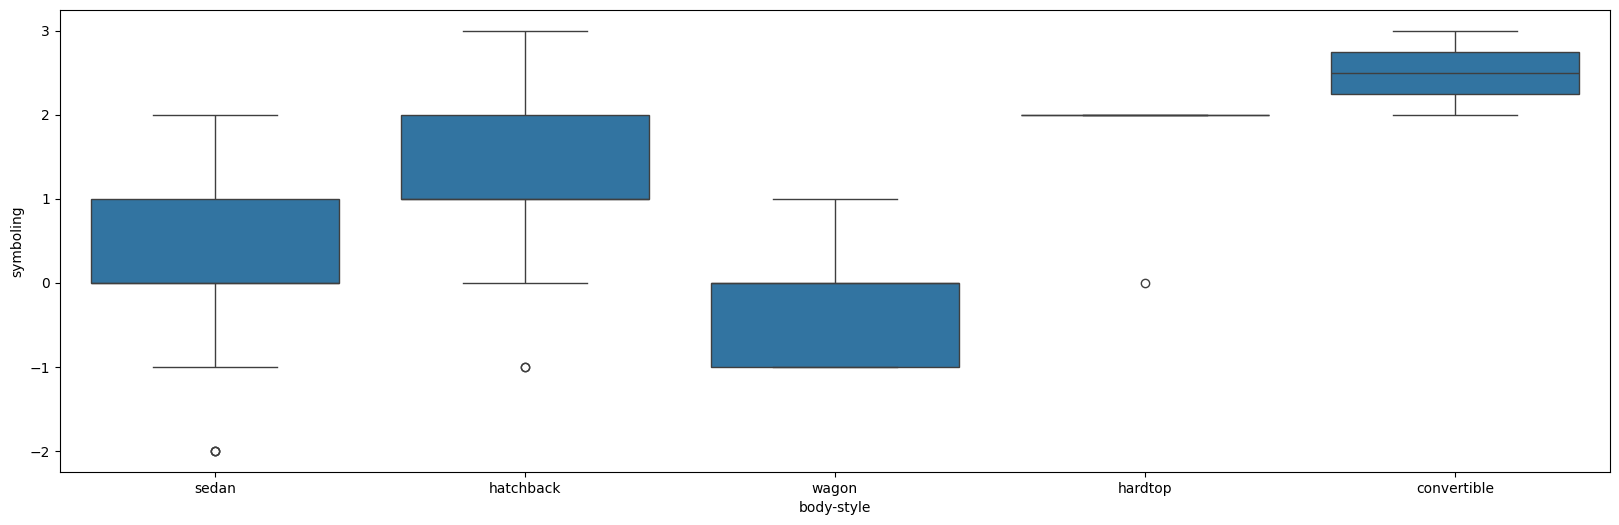

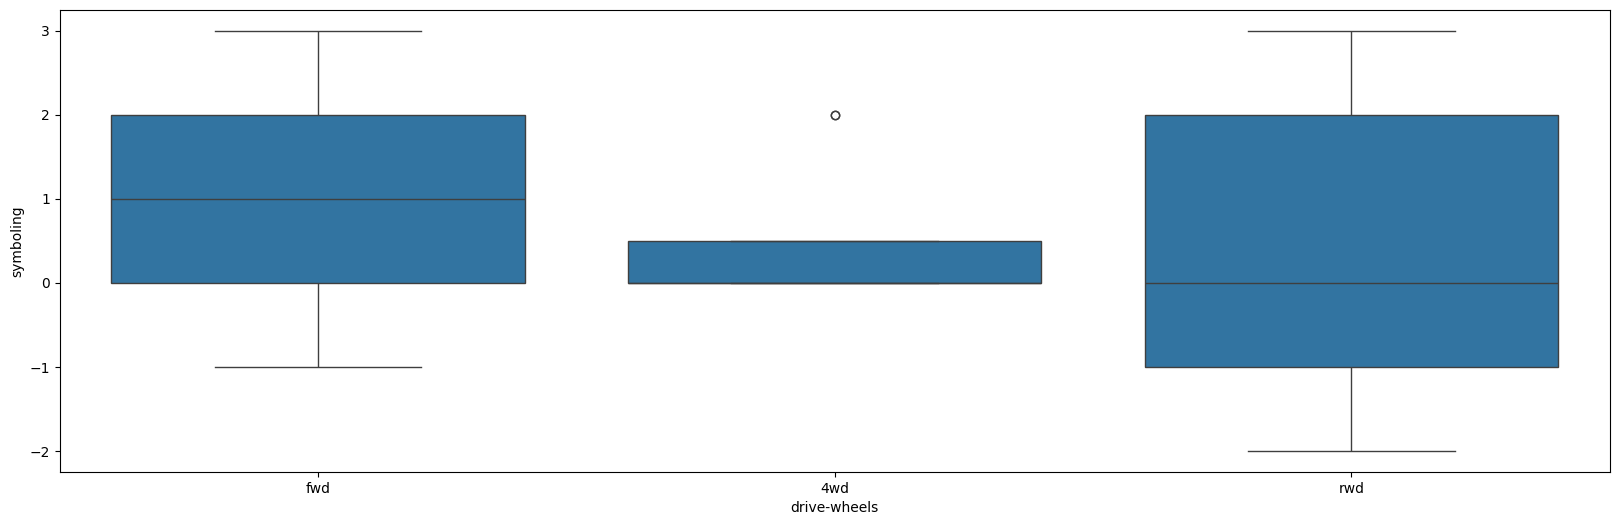

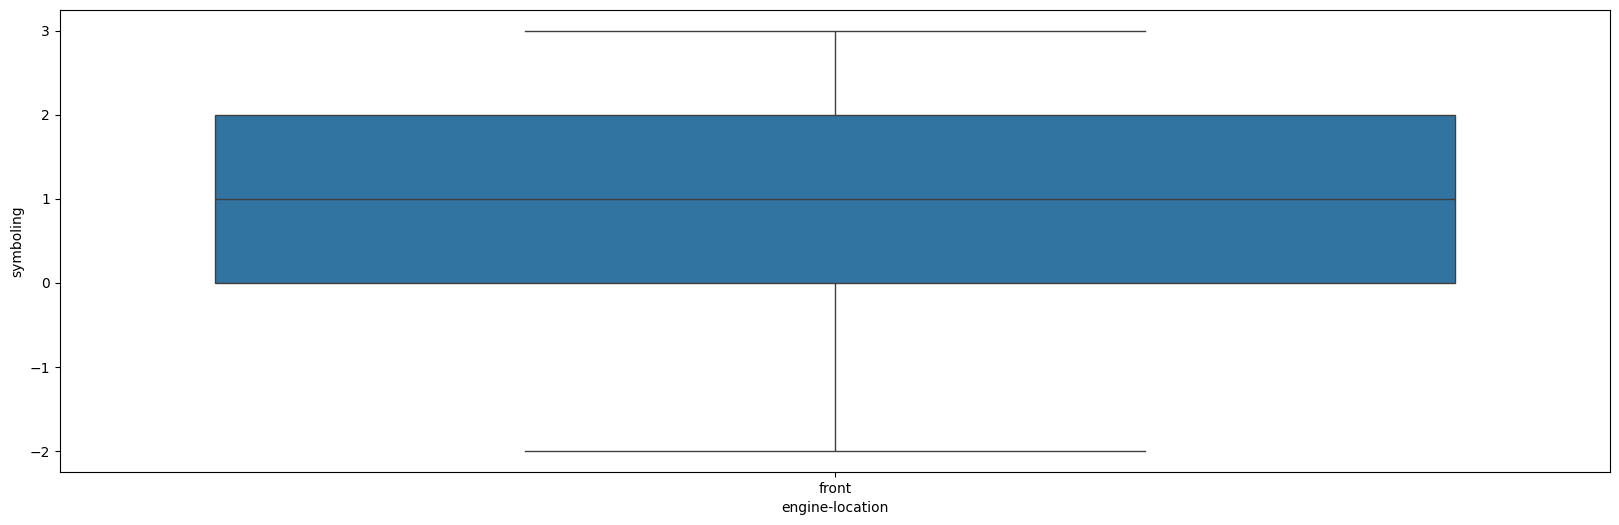

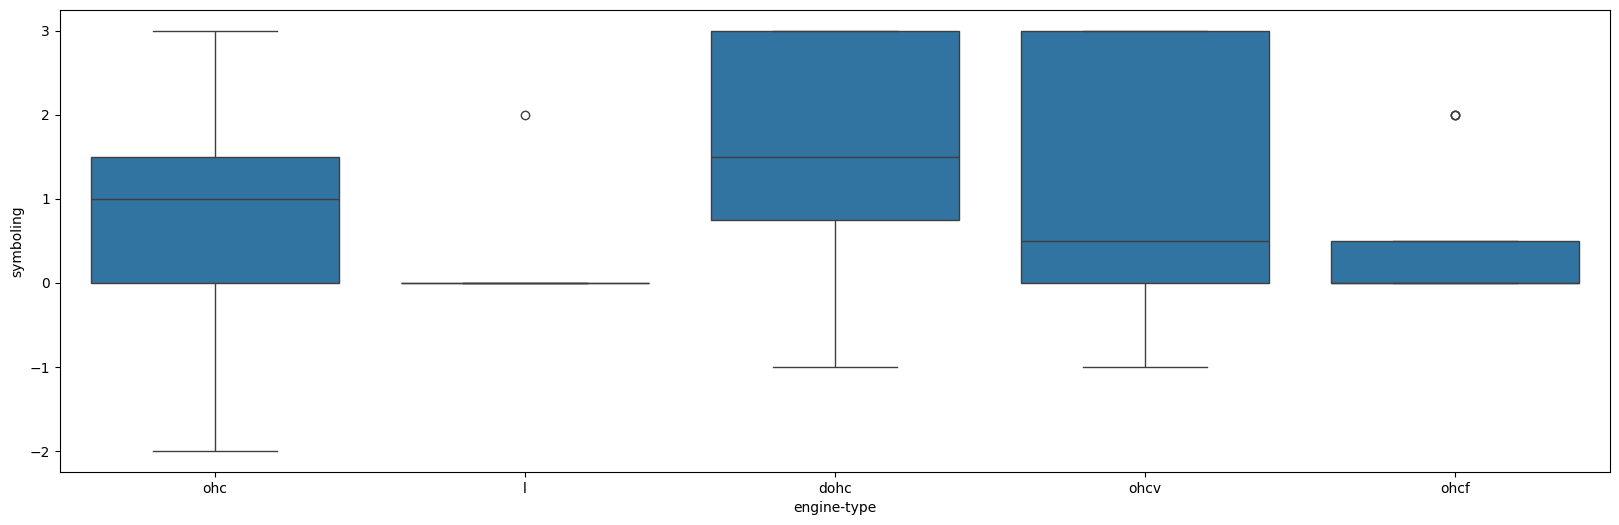

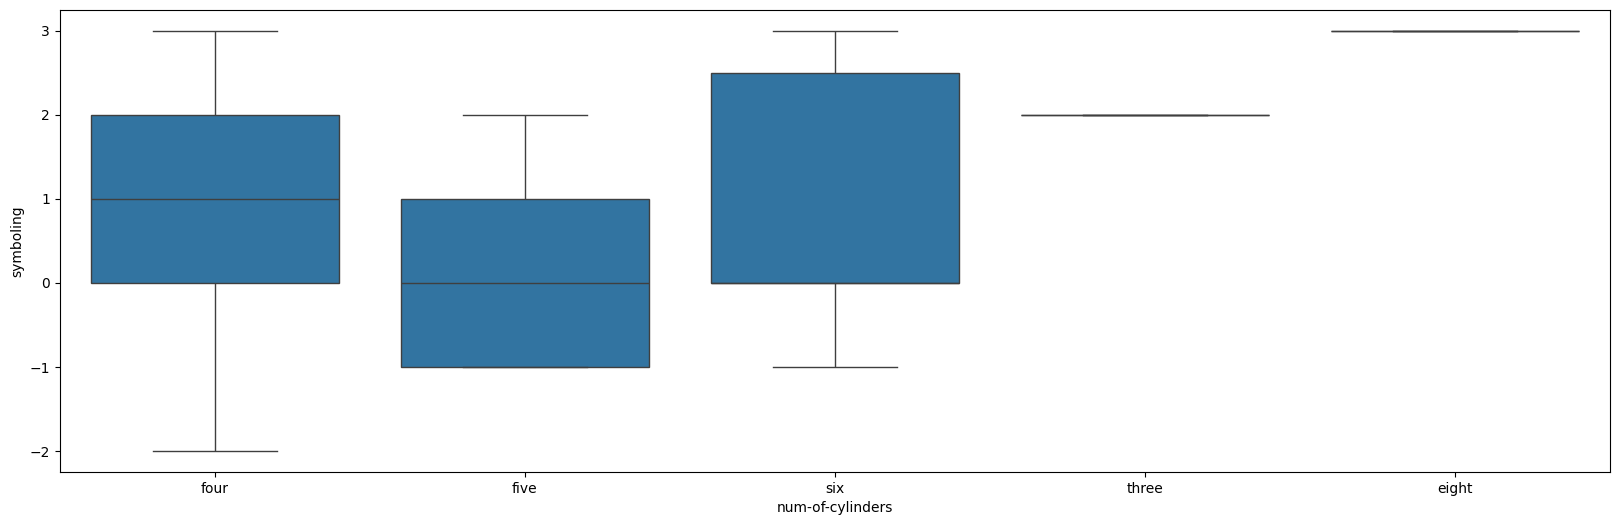

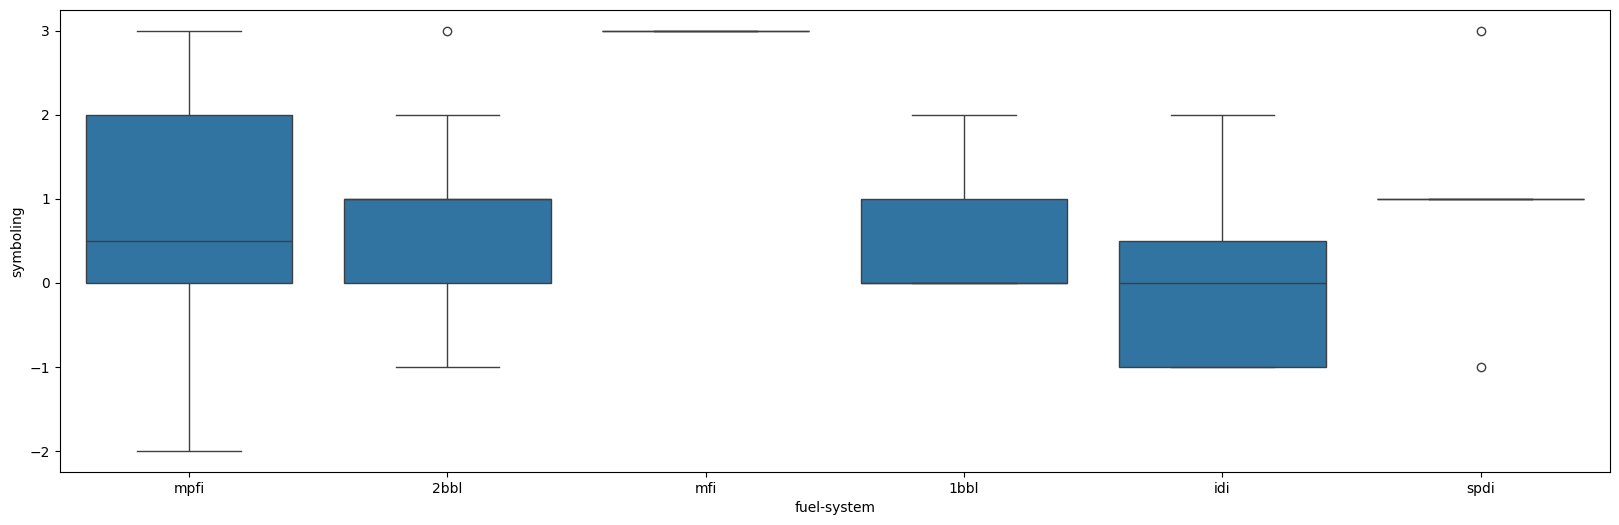

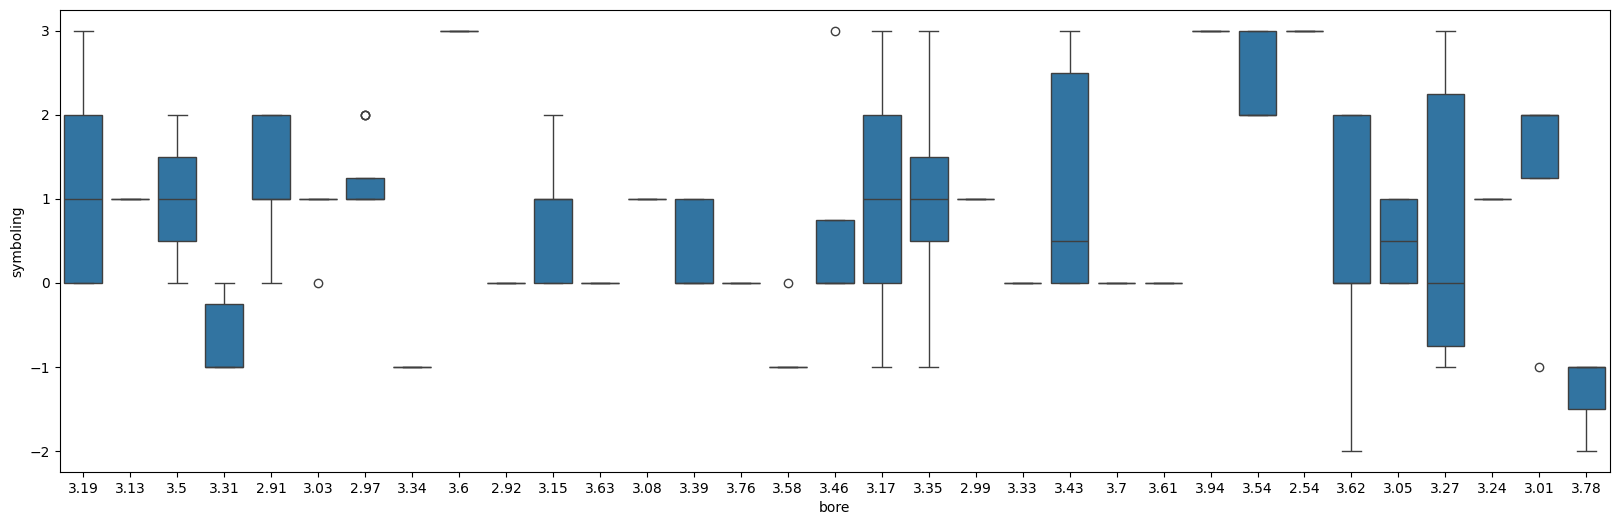

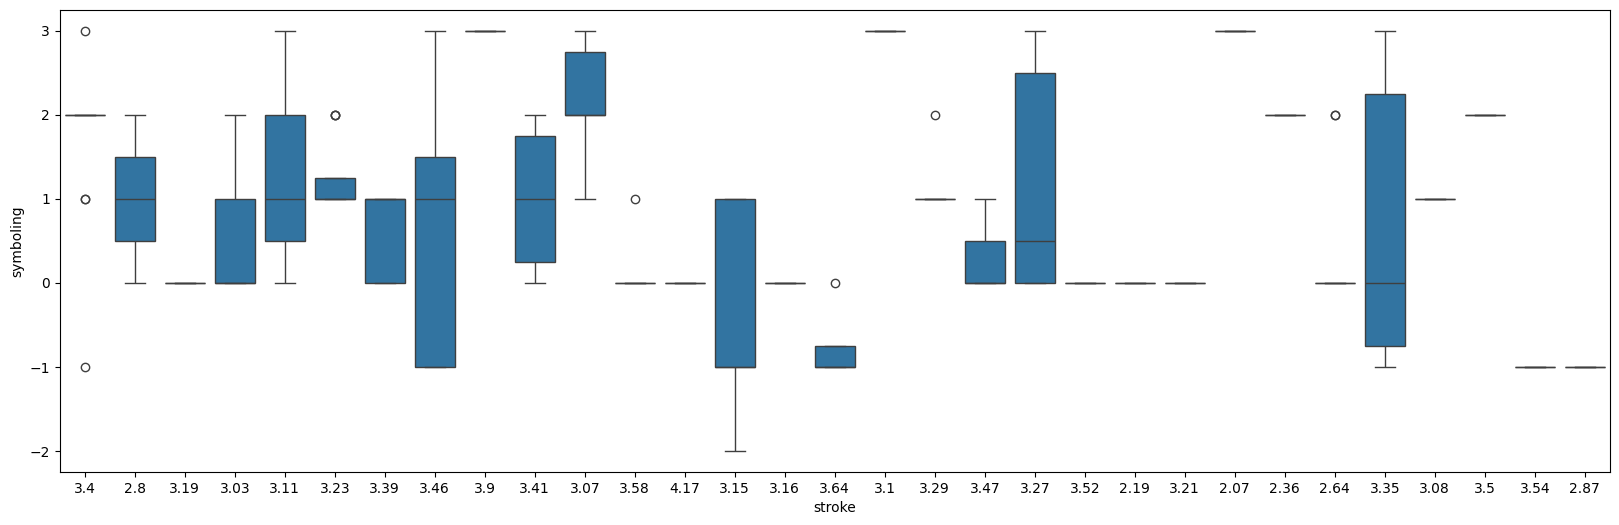

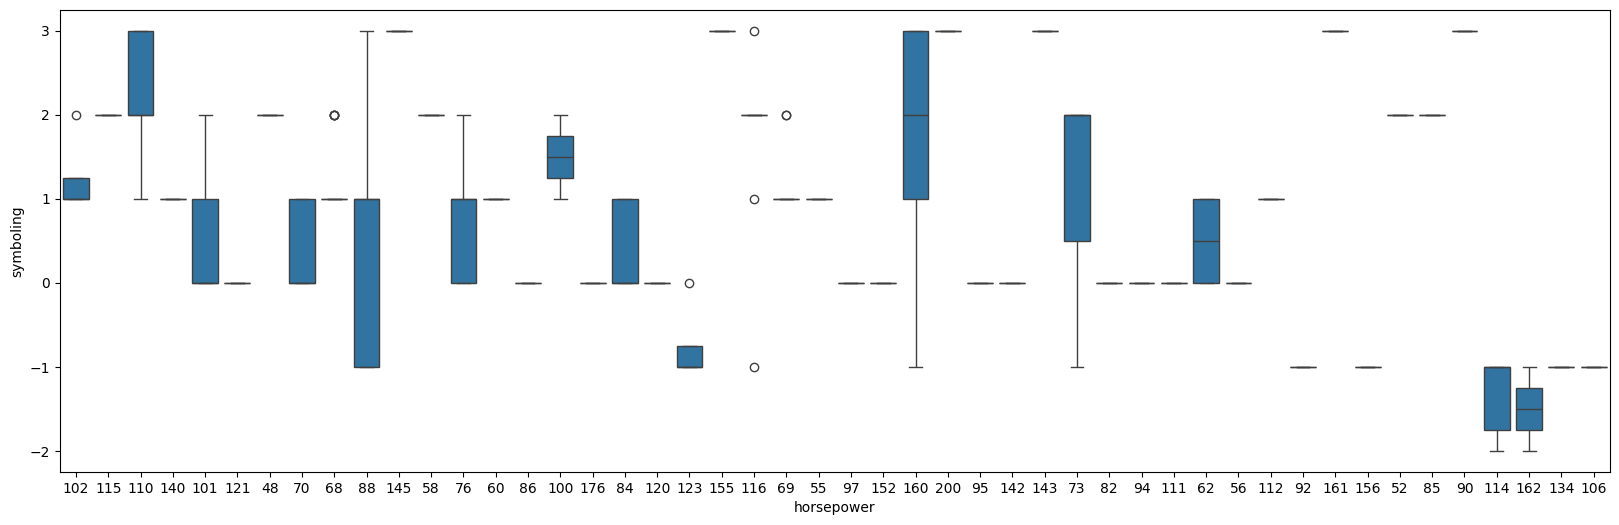

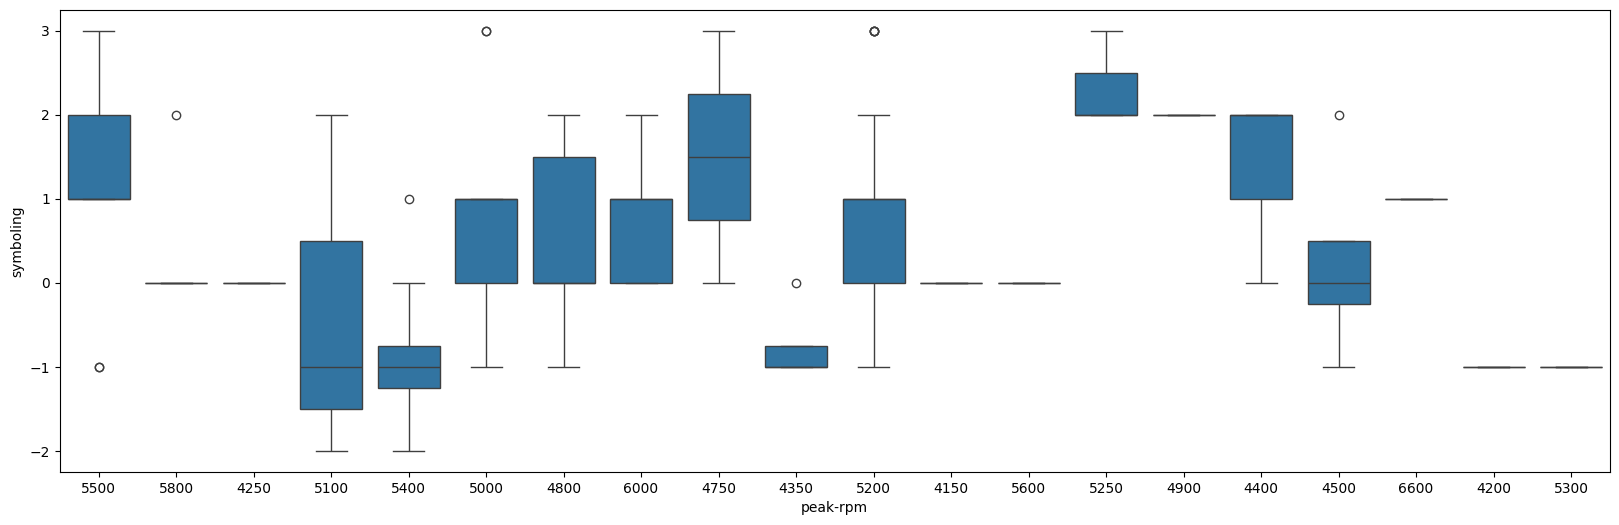

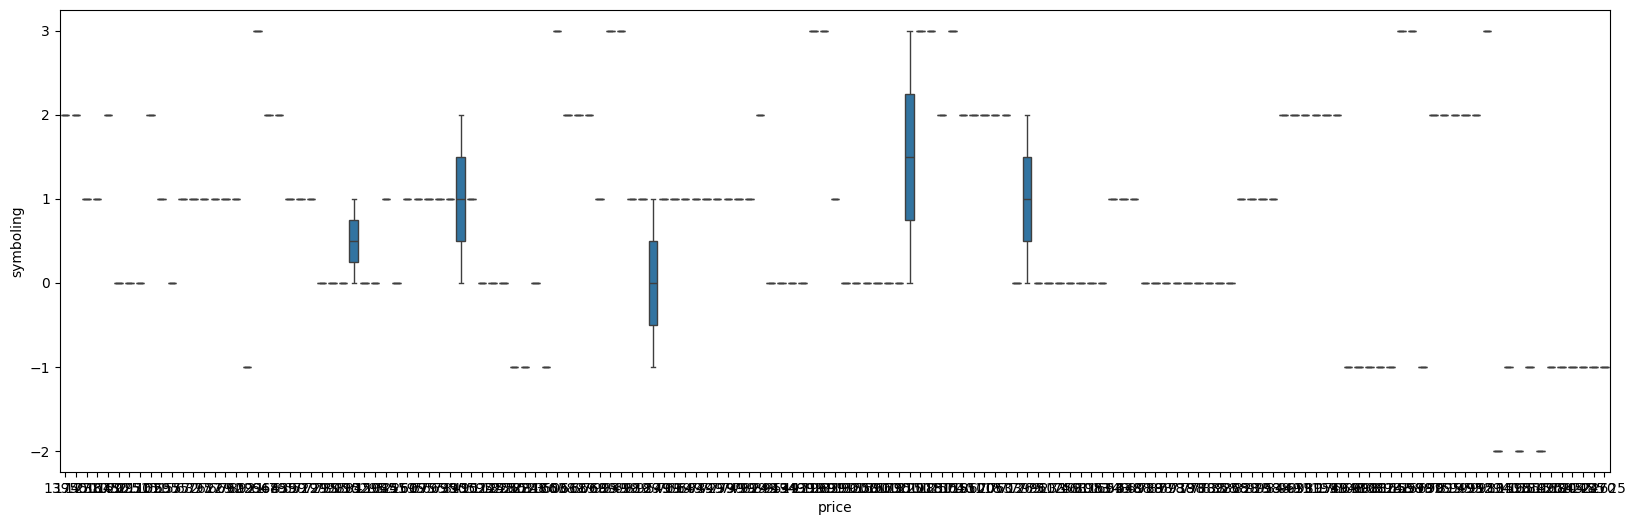

In [85]:
#Relationship Between Numerical and Categorical Features:
# Boxplot for numerical features grouped by a categorical feature
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=column, y='symboling', data=df)
    plt.show()